# Walmart - Business CaseStudy [CLT and Confidence Interval]







## Analysed by -Aakash Kumar Boity

Walmart , founded in 1962 by Sam Walton , is a retail giant and one of the world's largest and most influential companies. Headquartered in
Bentonville, Arkansas , this American multinational corporation has established itself as a global powerhouse in the retail industry. Walmart
operates a vast network of hypermarkets, discount department stores, and grocery stores under various brand names across the United States
and in numerous countries around the world.

Known for its "Everyday Low Prices" strategy, Walmart has redefined the retail landscape with its commitment to offering a wide range of
products at affordable prices. With its extensive supply chain and efficient distribution systems, the company has played a pivotal role in shaping
consumer expectations and shopping habits. Beyond retail, Walmart has also ventured into e-commerce, technology innovation, and sustainability
initiatives, further solidifying its position as a key player in the modern retail ecosystem.

Walmart: Where Shopping Becomes a Global Phenomenon
Walmart , the retail titan, stretches its tentacles across 19 countries, boasting over 10,500 stores and serving more than 100 million customers
worldwide. It's not just a shopping haven; it's a data goldmine waiting to be unearthed.

A Retail Colossus with a Human Touch
Despite its vast size, Walmart remains dedicated to its core values of customer service and community involvement. The company's philanthropic
efforts focus on areas like hunger relief and children's health, and its commitment to employee development has earned it recognition as a top
employer.

Walmart's story is far from over. As the retail landscape continues to evolve, this retail giant is sure to adapt and innovate, remaining a dominant
force in the world of shopping.

##Objective -
The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the
customer’s gender and the various other factors to help the business make better decisions.

They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than
men? (Assume 50 million customers are male and 50 million are female).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from scipy.stats import norm,boxcox
from statsmodels.stats.weightstats import ztest
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline



In [2]:
cp = ['#003087','#007dc6','#79b9e7','#ffb81c','#ffc120','#f47421','#6cace4','#76c143','#222222','#444444']
cp1 = ['#0071ce','#ffc220','#003087','#ffb81c','#6cace4']
cp2 = ['#0071CE','#FCB61A']
cp3 = ['#0071CE','#ffc220','#003087','#ffc120','#ffb81c','#f47421','#6cace4','#76c143','#222222','#444444','#79b9e7','#ffb81c']


In [3]:
wm=pd.read_csv("/content/walmart_data (1).csv")
wm1=wm.copy()

In [4]:
wm.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [5]:
wm.shape

(550068, 10)

In [6]:
wm.info

<bound method DataFrame.info of         User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000001  P00069042      F   0-17          10             A   
1       1000001  P00248942      F   0-17          10             A   
2       1000001  P00087842      F   0-17          10             A   
3       1000001  P00085442      F   0-17          10             A   
4       1000002  P00285442      M    55+          16             C   
...         ...        ...    ...    ...         ...           ...   
550063  1006033  P00372445      M  51-55          13             B   
550064  1006035  P00375436      F  26-35           1             C   
550065  1006036  P00375436      F  26-35          15             B   
550066  1006038  P00375436      F    55+           1             C   
550067  1006039  P00371644      F  46-50           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                               2               0                 3      8370  
1                               2               0                 1     15200  
2                               2               0                12      1422  
3                               2               0                12      1057  
4                              4+               0                 8      7969  
...                           ...             ...               ...       ...  
550063                          1               1                20       368  
550064                          3               0                20       371  
550065                         4+               1                20       137  
550066                          2               0                20       365  
550067                         4+               1                20       490  

[550068 rows x 10 columns]>

In [7]:
wm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


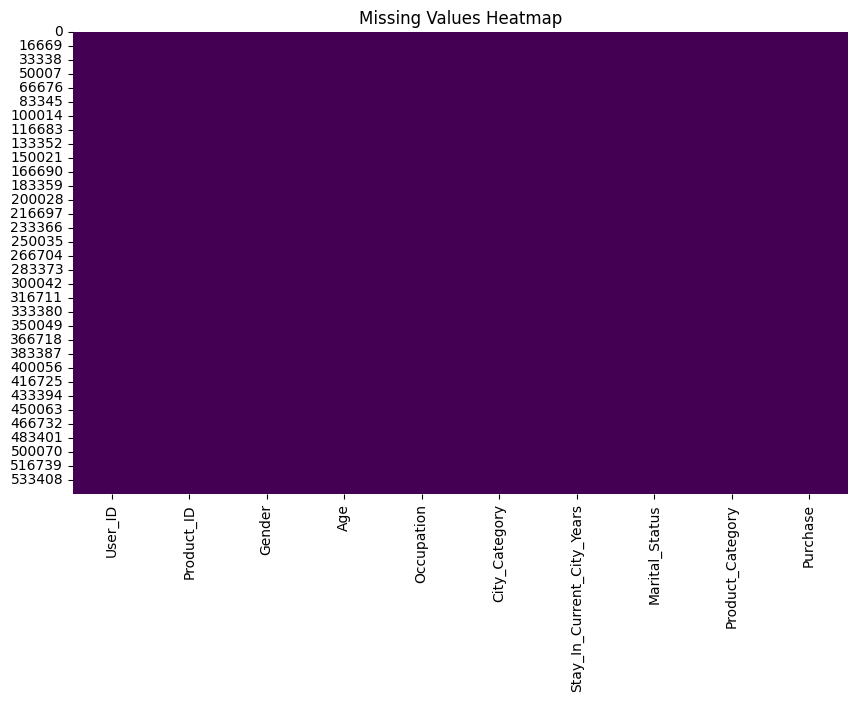

In [8]:
plt.figure(figsize=(10, 6))
sns.heatmap(wm.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [9]:
wm.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [10]:
for i in wm.columns:
  print(wm[i].value_counts())

User_ID
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1004991       7
1005391       7
1000094       7
1005608       7
1000708       6
Name: count, Length: 5891, dtype: int64
Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00325342       1
P00312542       1
P00008942       1
P00315142       1
P00365942       1
Name: count, Length: 3631, dtype: int64
Gender
M    414259
F    135809
Name: count, dtype: int64
Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64
Occupation
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: count, dtype: int64
City_Category
B    231173
C    171175
A

In [11]:
wm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [12]:
for i in wm.columns[:-1]:
  wm[i]=wm[i].astype('category')

In [13]:
wm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(9), int64(1)
memory usage: 10.3 MB


In [14]:
wm.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


In [15]:
wm.shape

(550068, 10)

In [16]:
wm.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


In [17]:
wm.describe(include = 'category').T


,count,unique,top,freq
User_ID,550068,5891,1001680,1026
Product_ID,550068,3631,P00265242,1880
Gender,550068,2,M,414259
Age,550068,7,26-35,219587
Occupation,550068,21,4,72308
City_Category,550068,3,B,231173
Stay_In_Current_City_Years,550068,5,1,193821
Marital_Status,550068,2,0,324731
Product_Category,550068,20,5,150933


##Insights :-

The purchase amounts vary widely, with the minimum recorded purchase being $12   and  the maximum reaching $23961 . The
median purchase amount of $8047 is notably lower than the mean purchase amount of $9264 , indicating a Right-Skewed
Distribution where a few high-value purchases pull up the mean value.



 **User_ID** - Among *5,50,068* transactions there are `5891` unique user_id, indicating same customers
buying multiple products.
- **Product_ID** - There are `3631` unique products,with the product having the code `P00265242` being the
`highest seller`, with a maximum of `1,880 units` sold.
- **Gender** - Out of *5,50,068* transactions, *4,14,259* `(nearly 75%)` were done by **Male** gender
indicating a significant disparity in purchase behavior between males and females during the Black Friday
event.
- **Age** - We have `7` unique age groups in the dataset. `26 - 35` Age group has maximum of *2,19,587*
transactions. We will analyse this feature in detail in future
- **Stay_In_Current_City_Years** - Customers with `1` year of stay in current city accounted to maximum of
`1,93,821` transactions among all the other customers with (0,2,3,4+) years of stay in current city

**Marital_Status** - `59%` of the total transactions were done by `Unmarried Customers` and `41%` by
`Married Customers`.

In [18]:
wm.duplicated().any()

np.False_

In [19]:
wm['Marital_Status'] = wm['Marital_Status'].replace({0:'Single',1:'Married'})
wm['Marital_Status'].unique()

['Single', 'Married']
Categories (2, object): ['Single', 'Married']

In [20]:
wm.sample()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
337886,1003999,P00120842,M,36-45,17,B,4+,Single,8,7919


In [21]:
wm['Gender'].value_counts(normalize=True).to_frame().reset_index()

,Gender,proportion
0,M,0.753105
1,F,0.246895


In [22]:
for i  in wm.columns[:-1]:
  print(" ")
  print(i)
  print((wm[i].value_counts(normalize=True)*100).reset_index())
  print()
  print()

 
User_ID
      User_ID  proportion
0     1001680    0.186522
1     1004277    0.177978
2     1001941    0.163253
3     1001181    0.156708
4     1000889    0.149618
...       ...         ...
5886  1005810    0.001273
5887  1004991    0.001273
5888  1000094    0.001273
5889  1005391    0.001273
5890  1000708    0.001091

[5891 rows x 2 columns]


 
Product_ID
     Product_ID  proportion
0     P00265242    0.341776
1     P00025442    0.293600
2     P00110742    0.293055
3     P00112142    0.283965
4     P00057642    0.267240
...         ...         ...
3626  P00077342    0.000182
3627  P00077542    0.000182
3628  P00068342    0.000182
3629  P00074742    0.000182
3630  P00074542    0.000182

[3631 rows x 2 columns]


 
Gender
  Gender  proportion
0      M   75.310507
1      F   24.689493


 
Age
     Age  proportion
0  26-35   39.919974
1  36-45   19.999891
2  18-25   18.117760
3  46-50    8.308246
4  51-55    6.999316
5    55+    3.909335
6   0-17    2.745479


 
Occupation
   Occupatio

In [23]:
cols=wm.columns[:-1]
cat_cols=wm[cols].melt()
cat_cols

,variable,value
0,User_ID,1000001
1,User_ID,1000001
2,User_ID,1000001
3,User_ID,1000001
4,User_ID,1000002
...,...,...
4950607,Product_Category,20
4950608,Product_Category,20
4950609,Product_Category,20
4950610,Product_Category,20


In [24]:
cat_cols.groupby(['variable','value'])['value'].count()/len(wm['User_ID'])*100

variable  value  
Age       0-17        2.745479
          18-25      18.117760
          26-35      39.919974
          36-45      19.999891
          46-50       8.308246
                       ...    
User_ID   1006036     0.093443
          1006037     0.022179
          1006038     0.002182
          1006039     0.013453
          1006040     0.032723
Name: value, Length: 9582, dtype: float64

In [25]:
(cat_cols.groupby(['variable','value'])[['value']].count() / len(wm['User_ID'])*100).round(2)

value
variable value         
Age      0-17      2.75
         18-25    18.12
         26-35    39.92
         36-45    20.00
         46-50     8.31
...                 ...
User_ID  1006036   0.09
         1006037   0.02
         1006038   0.00
         1006039   0.01
         1006040   0.03

[9582 rows x 1 columns]

In [26]:

print(f"Genderwise distribution".upper())
print()
for _ in wm.columns[:-1]:
 if _ not in ["User_ID","Purchase","Gender"]:
     print("_" * len(f"For {_}"))
     print(f"For {_} :".upper())
     print("_" * len(f"For {_}"))
     print()
     print(f"{'---> '}Total Count of Users based on {_}")
     print()
     print(pd.crosstab(index = wm["Gender"], columns = wm[_],
         values = wm["User_ID"], aggfunc = "count", margins = True))

     print("")
     print(f"{'---> '}Total Purchase amount per user based on {_}")
     print()
     print(pd.crosstab(index = wm["Gender"], columns = wm[_],
     values = wm["Purchase"], aggfunc = "sum", margins = True))
     print()
     print("")
     print(f"{'---> '}Total Purchase amount per user in percentage based on {_}")
     print()
     print((pd.crosstab(index = wm["Gender"], columns = wm[_], values = wm["Purchase"],
     aggfunc = "sum", margins = True, normalize = True)*100).round(2))
     print("_" * 140)

GENDERWISE DISTRIBUTION

______________
FOR PRODUCT_ID :
______________

---> Total Count of Users based on Product_ID

Product_ID  P00000142  P00000242  P00000342  P00000442  P00000542  P00000642  \
Gender                                                                         
F                 347         91         69         46         50         71   
M                 805        285        175         46         99        441   
All              1152        376        244         92        149        512   

Product_ID  P00000742  P00000842  P00000942  P00001042  ...  P0099042  \
Gender                                                  ...             
F                 117         14          7         76  ...        51   
M                 124         22         48        427  ...        93   
All               241         36         55        503  ...       144   

Product_ID  P0099142  P0099242  P0099342  P0099442  P0099642  P0099742  \
Gender                                 

In [27]:
wm.sample()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
280236,1001196,P00313342,F,18-25,14,C,3,Single,5,7090


#Finding outliers:-

In [28]:
col=['Purchase']
Q1=np.percentile(wm[col],25)
Q2=np.median(wm[col])
Q3=np.percentile(wm[col],75)


IQR=Q3-Q1
IQR

np.float64(6231.0)

In [29]:
lo = Q1 - (1.5 * IQR)
ho = Q3 + (1.5*IQR)

In [30]:
# 1. Calculate Outliers
# Assuming 'wm' is your DataFrame and 'ho'/'lo' are already calculated
data = wm['Purchase']

# 1. Calculate Outliers
right_outliers = wm[wm['Purchase'] > ho]
left_outliers = wm[wm['Purchase'] < lo]

# 2. Calculate Whiskers (The Fix)
# Upper Whisker: Max value that is still within the Upper Bound (ho)
upper_whisker = data[data <= ho].max()

# Lower Whisker: Min value that is still within the Lower Bound (lo)
lower_whisker = data[data >= lo].min()

# 3. Print Results
print(f"Q1 : {Q1}")
print(f"Q2 : {Q2}")
print(f"Q3 : {Q3}")
print(f"IQR : {IQR}")
print(f"Lower bound : {lo}")
print(f"Upper bound : {ho}")
print(f"Lower Outlier : {len(left_outliers)}")
print(f"Upper Outlier : {len(right_outliers)}")
print(f"Lower Whisker : {lower_whisker}")
print(f"Upper Whisker : {upper_whisker}")

Q1 : 5823.0
Q2 : 8047.0
Q3 : 12054.0
IQR : 6231.0
Lower bound : -3523.5
Upper bound : 21400.5
Lower Outlier : 0
Upper Outlier : 2677
Lower Whisker : 12
Upper Whisker : 21399


In [31]:
right_outliers['User_ID'].nunique()

1487

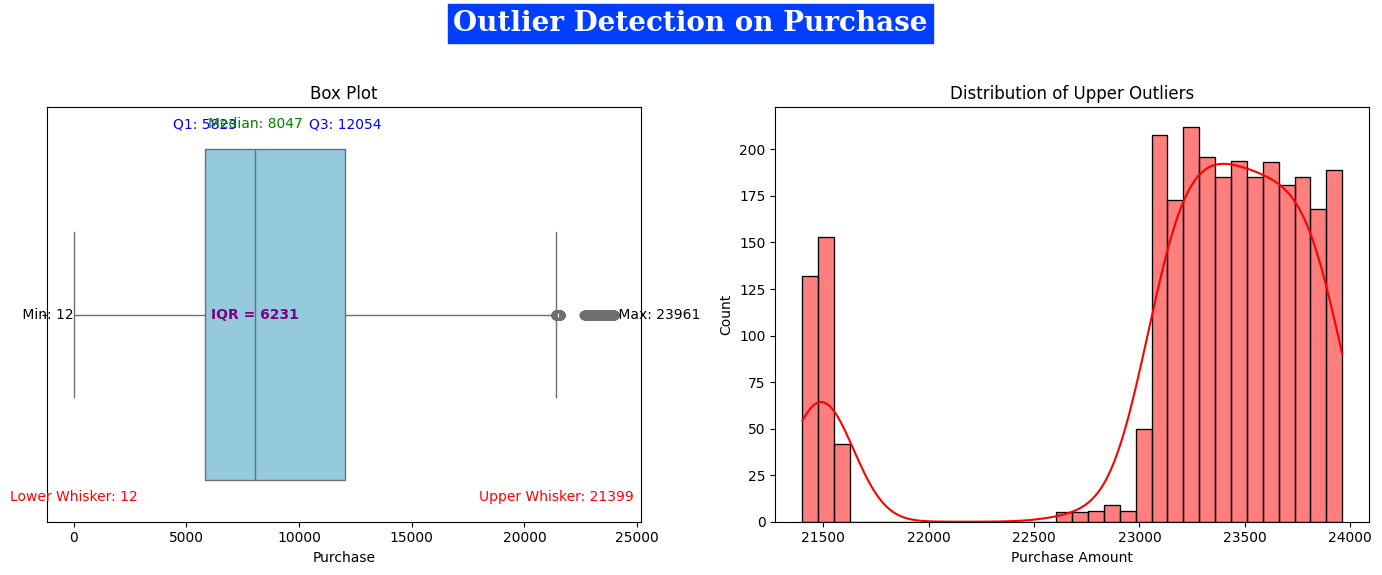

In [32]:
Q1 = data.quantile(0.25)
Q2 = data.median()
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
lo = Q1 - 1.5 * IQR
ho = Q3 + 1.5 * IQR

upper_whisker = data[data <= ho].max()
lower_whisker = data[data >= lo].min()
max_val = data.max()
min_val = data.min()
right_outliers = wm[wm['Purchase'] > ho]

# Define color palette 'cp2'
cp2 = sns.color_palette('bright')

# 2. Setup Figure
plt.figure(figsize=(14, 6))
plt.style.use('default') # Reset style first
# plt.style.use('seaborn-v0_8-bright') # Optional: Use if available

plt.suptitle(f'Outlier Detection on Purchase', fontfamily='serif', fontweight='bold', fontsize=20,
             backgroundcolor=cp2[0], color='w')

# 3. First Subplot: Box Plot with Labels
plt.subplot(1, 2, 1)
# Note: sns.boxplot is centered at y=0. We must adjust text coordinates relative to 0.
sns.boxplot(x=wm['Purchase'], color='skyblue')

# Add Text Labels (Adjusted for Seaborn coordinates)
# Placing Q1, Median, Q3 slightly above the box (y approx -0.45)
plt.text(Q1, -0.45, f'Q1: {Q1:.0f}', ha='center', color='blue')
plt.text(Q2, -0.45, f'Median: {Q2:.0f}', ha='center', color='green')
plt.text(Q3, -0.45, f'Q3: {Q3:.0f}', ha='center', color='blue')

# Label IQR (in the center, y=0)
plt.text(Q2, 0, f'IQR = {IQR:.0f}', ha='center', va='center', color='purple', fontweight='bold')

# Label Whiskers (Below the box, y approx 0.45)
plt.text(upper_whisker, 0.45, f'Upper Whisker: {upper_whisker:.0f}', ha='center', color='red')
plt.text(lower_whisker, 0.45, f'Lower Whisker: {lower_whisker:.0f}', ha='center', color='red')

# Label Max and Min
plt.text(max_val, 0, f' Max: {max_val:.0f}', ha='left', va='center')
plt.text(min_val, 0, f' Min: {min_val:.0f}', ha='right', va='center')

plt.title('Box Plot')
plt.xlabel('Purchase')

# 4. Second Subplot: Histogram of Outliers
plt.subplot(1, 2, 2)
sns.histplot(right_outliers['Purchase'], kde=True, color='red')
plt.title('Distribution of Upper Outliers')
plt.xlabel('Purchase Amount')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for suptitle
plt.show()

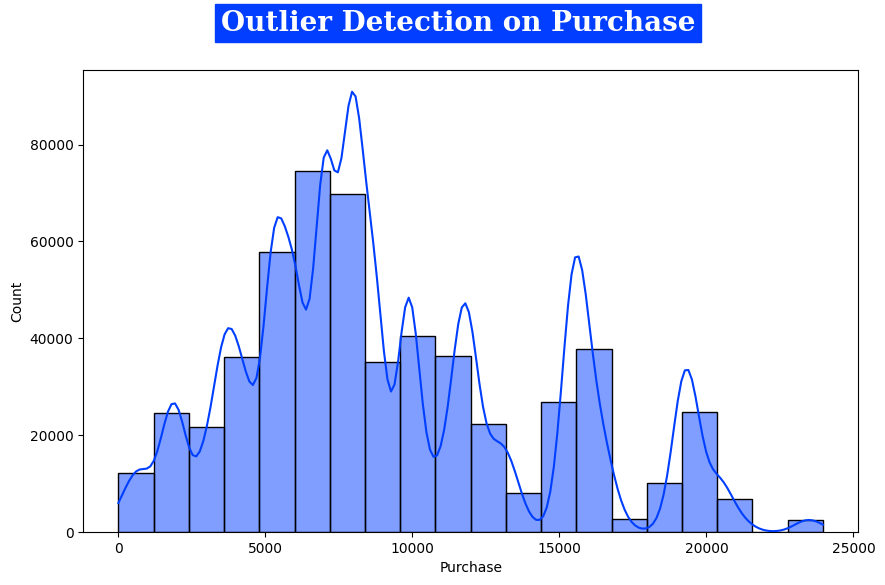

In [33]:
plt.figure(figsize=(10,6))
plt.suptitle(f'Outlier Detection on Purchase',fontfamily='serif',fontweight='bold',fontsize=20,
 backgroundcolor=cp2[0],color='w')
plt.style.use('default')
plt.style.use('seaborn-v0_8-bright')
sns.histplot(wm['Purchase'],bins=20,kde=True)
plt.show()

**Outliers**:-

There are total of 1027 outliers which is roughly 0.49% of the total data present in purchase amount. We will not remove them as
it indicates a broad range of spending behaviors during the sale, highlighting the importance of tailoring marketing strategies to both
regular and high-value customers to maximize revenue.

**Distribution**:-

Data suggests that the majority of customers spent between 5,823 USD and 12,054 USD , with the median purchase amount being
8,047 USD .
The lower limit of 12 USD while the upper limit of 21,400 USD reveal significant variability in customer spending


#Graphical analysis:-

Univariate analysis and Bivariate analysis

In [34]:
wm.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,Single,3,8370
1,1000001,P00248942,F,0-17,10,A,2,Single,1,15200
2,1000001,P00087842,F,0-17,10,A,2,Single,12,1422
3,1000001,P00085442,F,0-17,10,A,2,Single,12,1057
4,1000002,P00285442,M,55+,16,C,4+,Single,8,7969


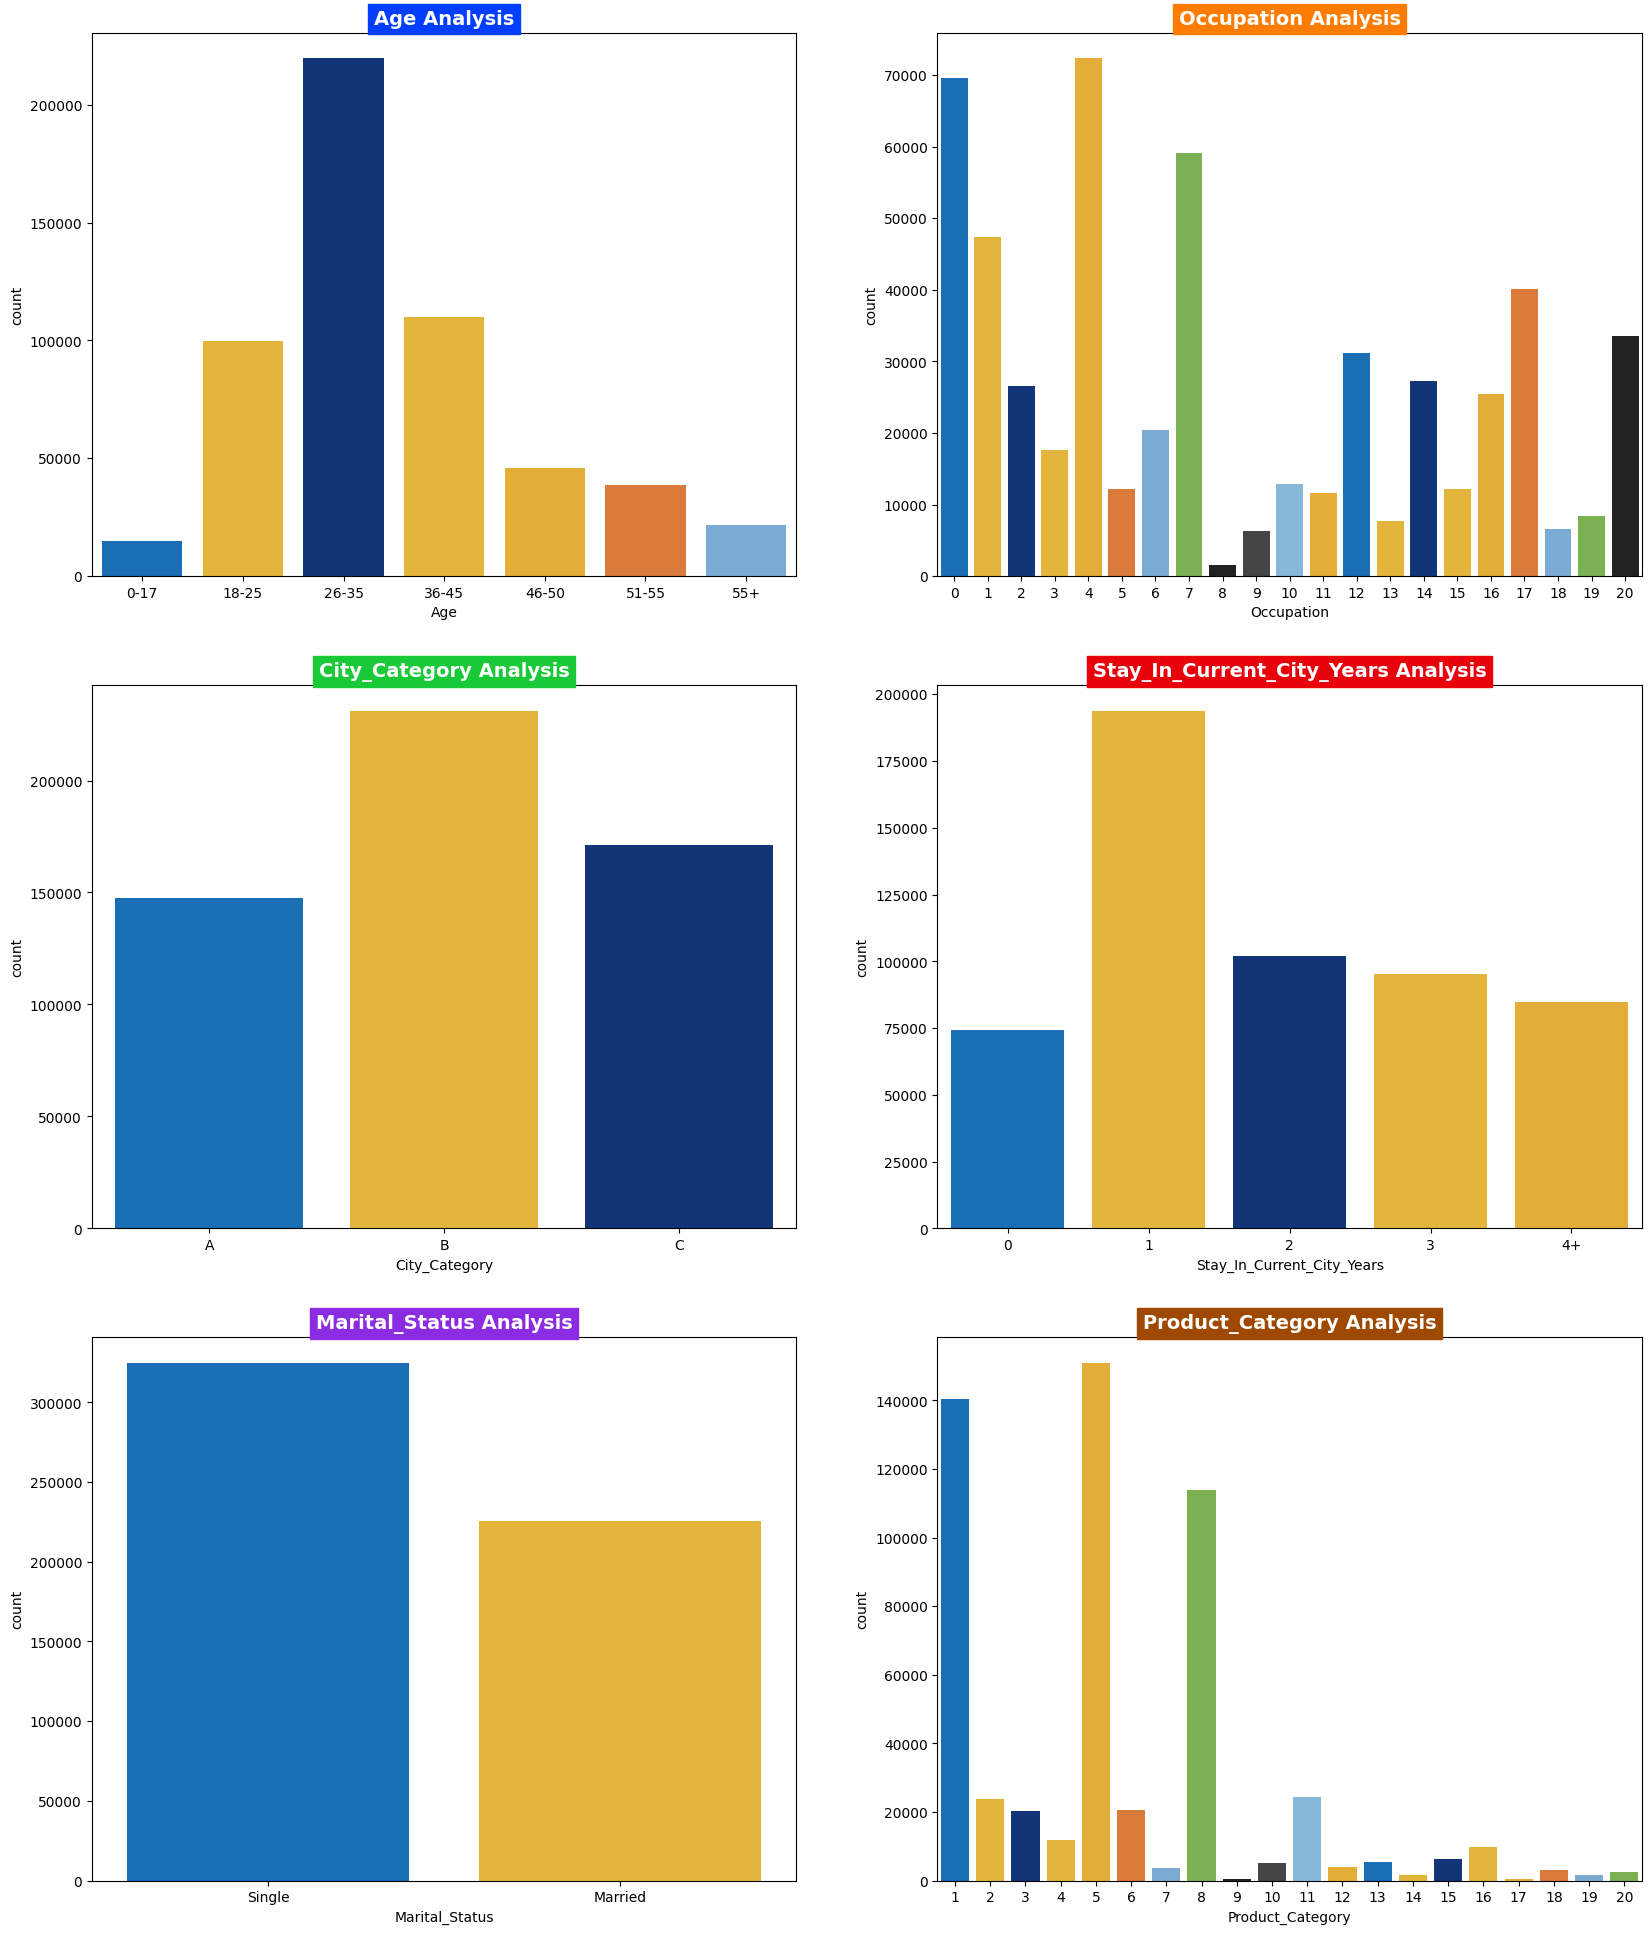

In [35]:
col=['Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category']
plt.figure(figsize=(20,24))
plt.style.use('default')
plt.style.use('seaborn-v0_8-bright')

for i in range(len(col)):
  plt.subplot(3,2,i+1)
  sns.countplot(wm,x=wm[col[i]],palette=cp3)
  plt.title(f"{col[i]} Analysis",fontsize=14,fontweight='bold',color='w',backgroundcolor=cp2[i])



##Insights:
##Observation

Customers in the age group of 26-35 have purchased more than other age groups.

Customers from City_Category B have purchased more than other city customers.

Customers who stay more than 1 year in a city has the tendency to visit and
purchase more.

Customers who are Single has purchased more than the customers who are married.


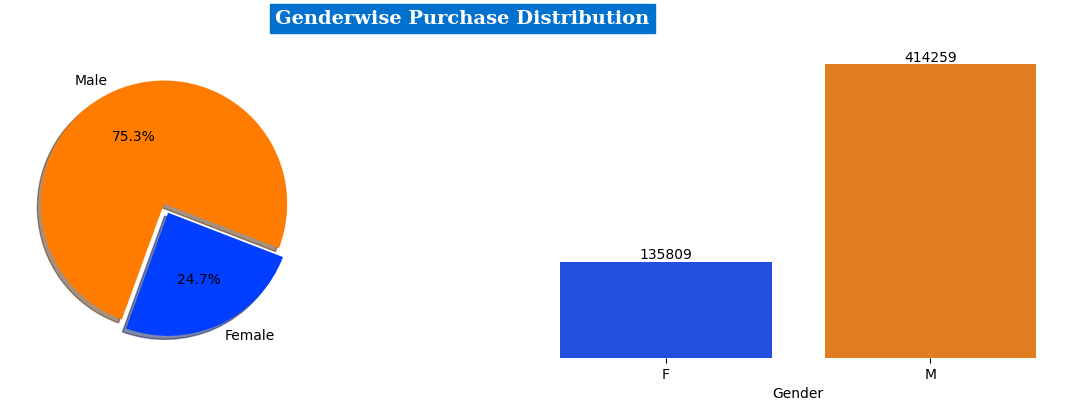

In [36]:
plt.figure(figsize=(15,4))
plt.suptitle("Genderwise Purchase Distribution",fontsize=14,fontfamily='serif',fontweight='bold'
 ,backgroundcolor=cp1[0],color='w')
plt.style.use('default')
plt.style.use('seaborn-v0_8-bright')
plt.subplot(1,2,1)
plt.pie(wm.groupby('Gender')['Gender'].count(), labels = ['Female','Male'], explode = (0.08,0),
 colors=cp2,shadow=True, startangle=250, autopct='%1.1f%%',textprops={'color':"k"})

plt.subplot(1,2,2)
label = sns.countplot(data = wm, x='Gender',palette=cp2)
sns.despine(left=True,bottom=True)
plt.yticks([])
plt.ylabel('')
for i in label.containers:
 label.bar_label(i)

plt.show()

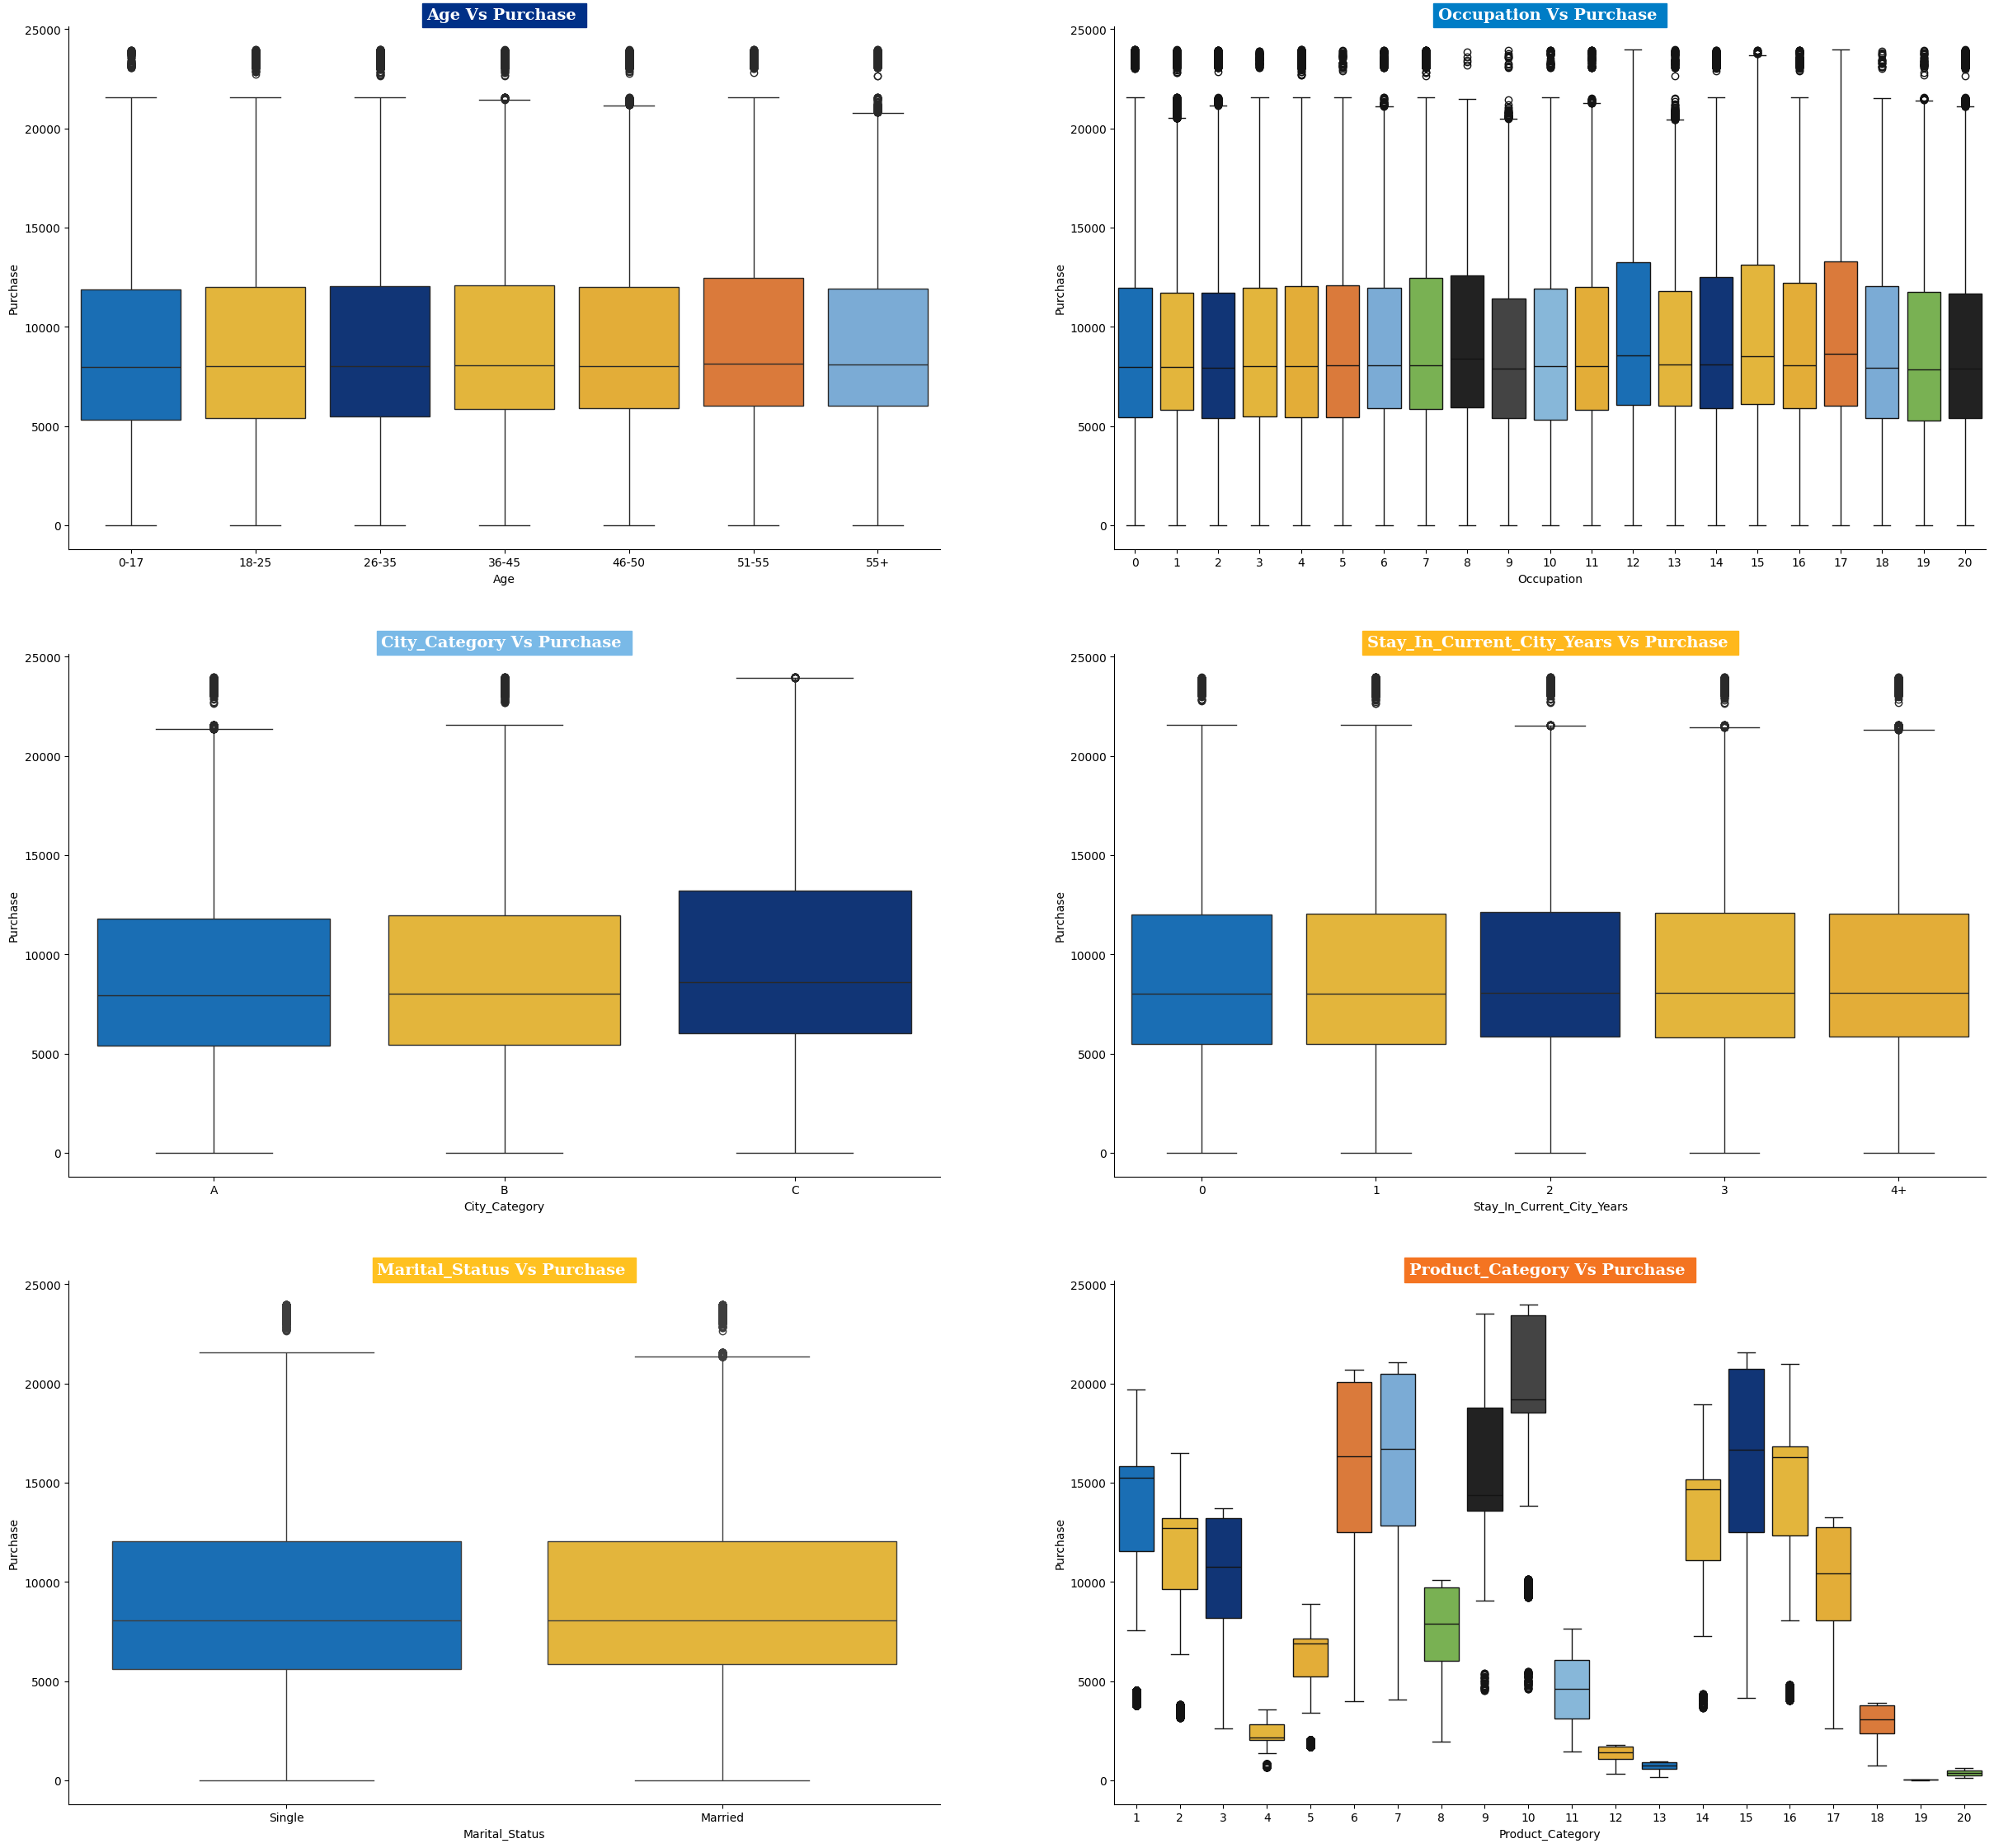

In [37]:
cat_cols = ['Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status', 'Product_Category']
plt.figure(figsize = (30,28))
plt.style.use('seaborn-v0_8-bright')
for i in range(len(cat_cols)):
 plt.subplot(3,2,i+1)
 sns.boxplot(data = wm, x = cat_cols[i], y='Purchase', palette = cp3)
 sns.despine()
 plt.title(f'{cat_cols[i]} Vs Purchase ',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor=cp[i],color='w')

Q. Top 10 products and product_category based on Black Friday sales :


In [38]:
tspc = wm.groupby(['Product_Category']).agg(cnt=('User_ID','count'))[:10]
tspc = tspc.sort_values(by='cnt',ascending=False).reset_index()
tspc

,Product_Category,cnt
0,5,150933
1,1,140378
2,8,113925
3,2,23864
4,6,20466
5,3,20213
6,4,11753
7,10,5125
8,7,3721
9,9,410


In [39]:
tsp = wm.groupby(['Product_ID']).agg(cnt=('User_ID','count'))[:10]
tsp = tsp.sort_values(by='cnt',ascending=False).reset_index()
tsp

,Product_ID,cnt
0,P00000142,1152
1,P00000642,512
2,P00001042,503
3,P00000242,376
4,P00000342,244
5,P00000742,241
6,P00000542,149
7,P00000442,92
8,P00000942,55
9,P00000842,36


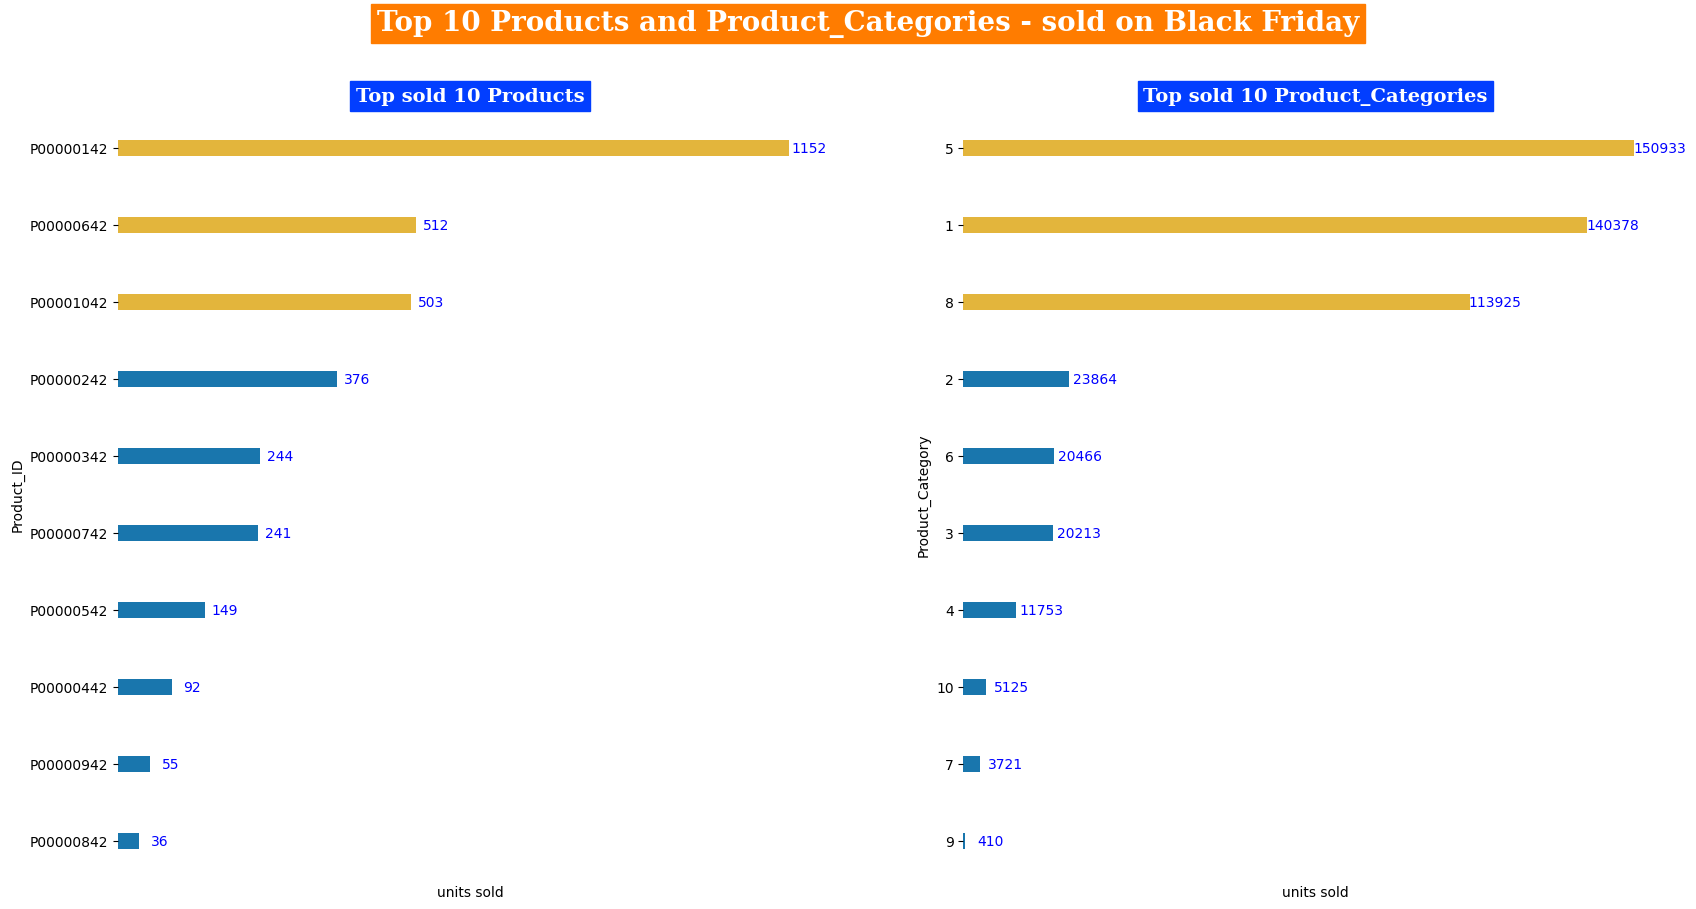

In [40]:
plt.figure(figsize=(20,10))
plt.style.use('default')
plt.style.use('seaborn-v0_8-bright')
plt.suptitle('Top 10 Products and Product_Categories - sold on Black Friday',fontfamily='serif',fontweight='bold',fontsize=20,
 backgroundcolor=cp2[1],color='w')
color_map = ['#ffc120' for i in range(3)] + ["#007dc6" for i in range(7)]
plt.subplot(1,2,2)
sns.barplot(y=tspc['Product_Category'] , x=tspc['cnt'],order=tspc['Product_Category'],palette=color_map,width=0.2)
#sns.scatterplot(y=tspc['Product_Category'],x=tspc['cnt'],palette=color_map,s=120)
sns.despine(left=True,bottom=True,trim=True)
plt.title('Top sold 10 Product_Categories',fontfamily='serif',fontweight='bold',fontsize=14,backgroundcolor=cp2[0],color='w')
plt.xlabel('units sold')
plt.xticks([])
n=10
for i in range(n):
 plt.annotate(tspc.cnt[i], (tspc.cnt[i]+5700,i+0.1),ha='center' , va='bottom' , color='b')
plt.subplot(1,2,1)
sns.barplot(y=tsp['Product_ID'] , x=tsp['cnt'],order=tsp['Product_ID'],palette=color_map,width=0.2)
#sns.scatterplot(y=tsp['Product_ID'] , x=tsp['cnt'],palette=color_map,s=120)
sns.despine(left=True,bottom=True,trim=True)
plt.title('Top sold 10 Products',fontfamily='serif',fontweight='bold',fontsize=14,backgroundcolor=cp2[0],color='w')
plt.xlabel('units sold')
plt.xticks([])
n=10
for i in range(n):
 plt.annotate(tsp.cnt[i], (tsp.cnt[i]+35,i+0.1),ha='center' , va='bottom' , color='b')
plt.show()

**Top 10 Products Sold**

The top-selling products during Walmart's Black Friday sales are characterized by a relatively small variation in sales numbers,
suggesting that Walmart offers a variety of products that many different customers like to buy.

**Top 10 Product Categories**
Categories 5,1 and 8 have significantly outperformed other categories with combined Sales of nearly 75% of the total sales
suggesting a strong preference for these products among customers.

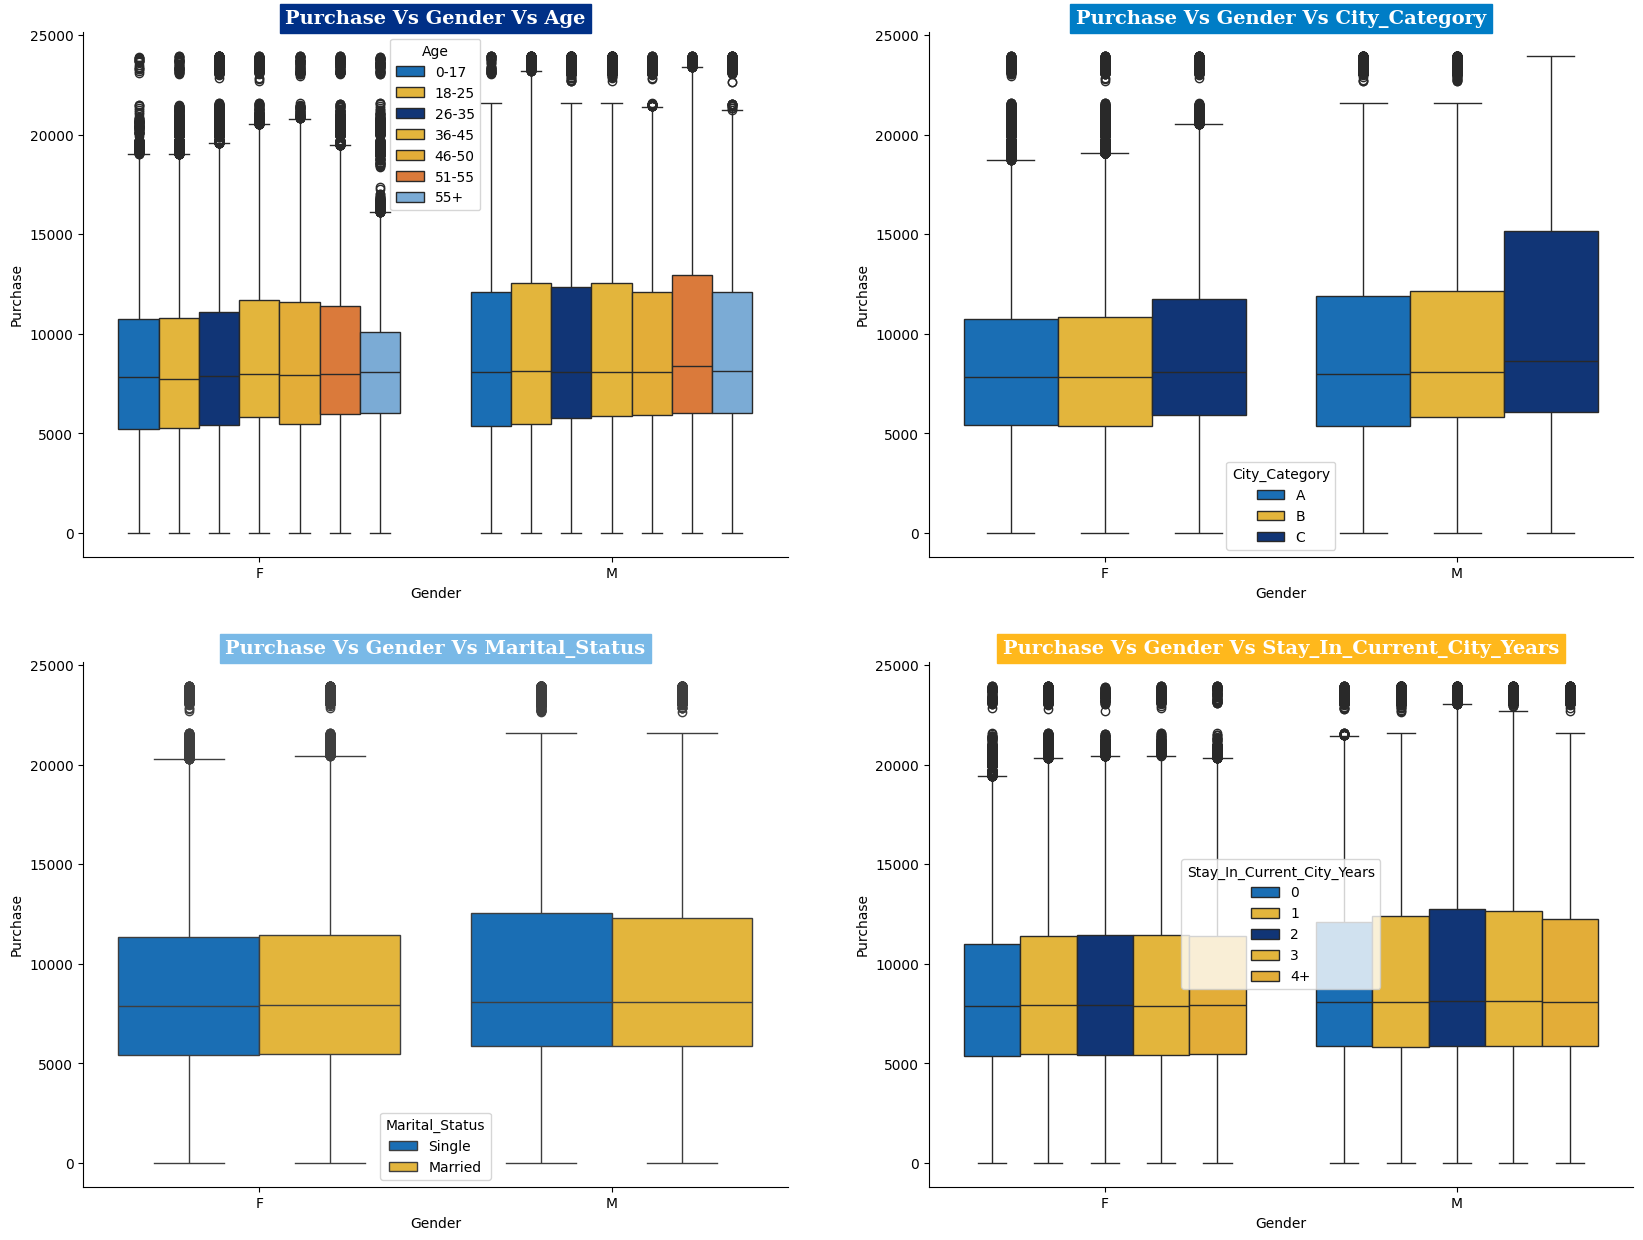

In [41]:
cat_cols = ['Age','City_Category','Marital_Status','Stay_In_Current_City_Years']
plt.figure(figsize = (20,15))
plt.style.use('seaborn-v0_8-bright')
for i in range(len(cat_cols)):
 plt.subplot(2,2,i+1)
 sns.boxplot(data = wm, x = 'Gender', y= 'Purchase',hue = cat_cols[i], palette = cp3)
 sns.despine()
 plt.title(f'Purchase Vs Gender Vs {cat_cols[i]}', fontsize = 14,fontfamily='serif',fontweight='bold'
 ,backgroundcolor=cp[i],color='w')


Q.Difference between the mean and median value of the purchase amount:

In [42]:
avg_purchase = wm.Purchase.mean()
avg_purchase

np.float64(9263.968712959126)

In [43]:
median_purchase = wm.Purchase.median()
median_purchase

8047.0

In [44]:
Difference = avg_purchase - median_purchase
Difference

np.float64(1216.9687129591257)

Q. Tracking the amount spent per transaction of all the 50 million female customers,and all the 50 million male
customers,calculate the average, and conclude the results.


In [45]:
avg_purchase_amt = wm.groupby('Gender')[['Purchase']].mean().reset_index().round(2)
avg_purchase_amt

,Gender,Purchase
0,F,8734.57
1,M,9437.53


In [46]:
wm_male = wm[wm['Gender']=='M']
wm_female = wm[wm['Gender']=='F']


In [47]:
psg = wm.groupby(['User_ID','Gender'])[['Purchase']].sum()
tpsg = psg[psg['Purchase']!=0]
tpsg.reset_index(inplace=True)
tpsg


,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
...,...,...,...
5886,1006036,F,4116058
5887,1006037,F,1119538
5888,1006038,F,90034
5889,1006039,F,590319


In [48]:

tpsg.groupby('Gender').agg(avg_purchase_amt=('Purchase','mean')).round(2)


,avg_purchase_amt
Gender,
F,712024.39
M,925344.40


In [49]:
wm.groupby('Gender')['Purchase'].describe().T

Gender,F,M
count,135809.000000,414259.00000
mean,8734.565765,9437.52604
std,4767.233289,5092.18621
min,12.000000,12.00000
25%,5433.000000,5863.00000
50%,7914.000000,8098.00000
75%,11400.000000,12454.00000
max,23959.000000,23961.00000


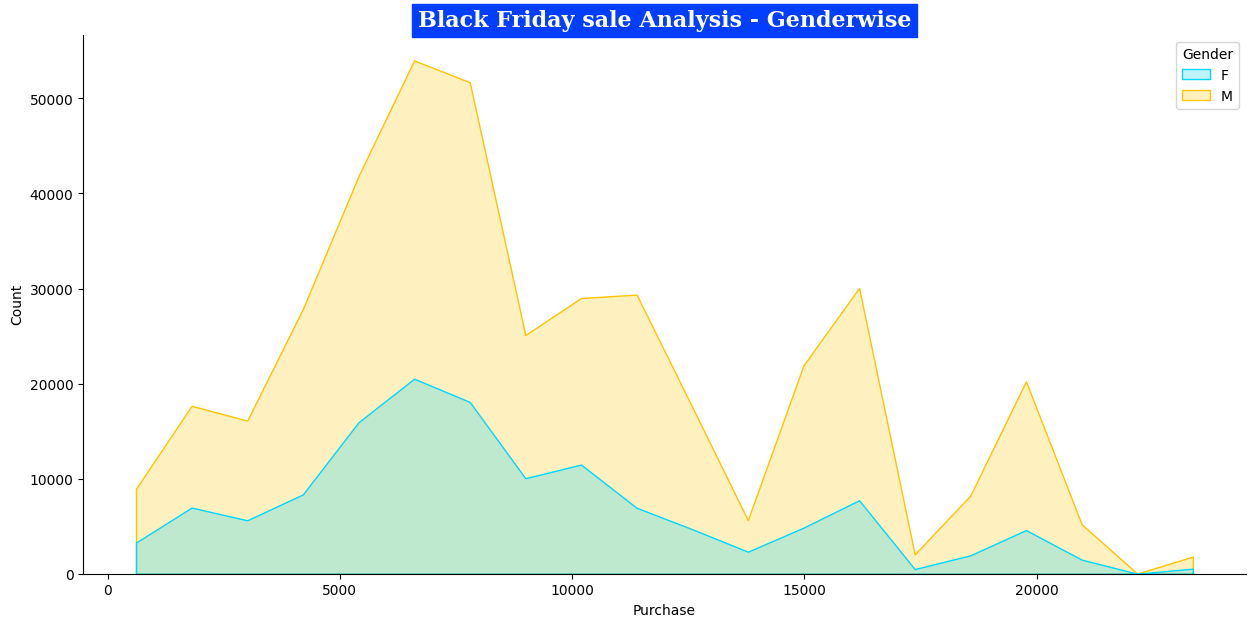

In [50]:
plt.figure(figsize=(15,7))
sns.histplot(data=wm, x = "Purchase", bins=20, hue = "Gender",element='poly',palette=cp2[::-1])
sns.despine()
plt.title('Black Friday sale Analysis - Genderwise',fontfamily='serif',fontweight='bold',fontsize=16,backgroundcolor=cp2[0],color='w')
plt.show()


In [51]:
male_purchase = tpsg[tpsg['Gender']=='M']['Purchase']
male_purchase
female_purchase = tpsg[tpsg['Gender']=='F']['Purchase']
female_purchase


,Purchase
0,334093
5,379930
9,2169510
10,557023
15,150490
...,...
5885,956645
5886,4116058
5887,1119538
5888,90034


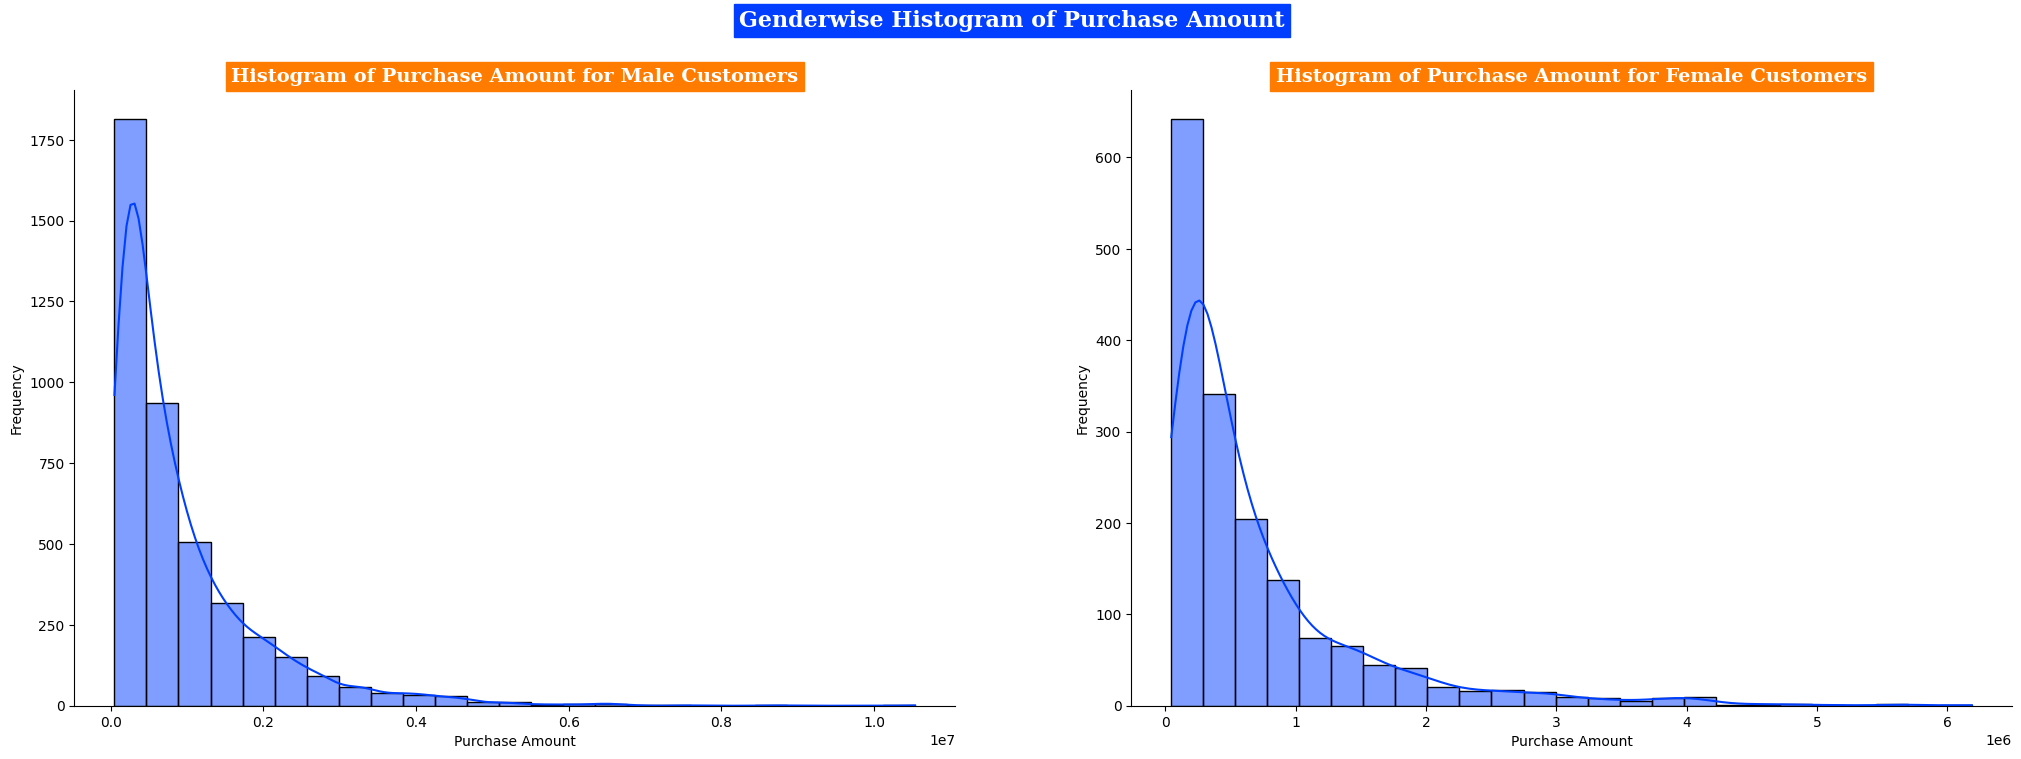

In [52]:
plt.figure(figsize=(25,8))
plt.style.use('default')
plt.style.use('seaborn-v0_8-bright')
plt.suptitle('Genderwise Histogram of Purchase Amount',fontfamily='serif',fontweight='bold',fontsize=16,
 backgroundcolor=cp2[0],color='w')
plt.subplot(1,2,1)
sns.histplot(male_purchase, bins=25,kde=True)
plt.title("Histogram of Purchase Amount for Male Customers",fontfamily='serif',fontweight='bold',fontsize=14,
 backgroundcolor=cp2[1],color='w')
plt.xlabel("Purchase Amount")
plt.ylabel("Frequency")
plt.subplot(1,2,2)
sns.histplot(female_purchase, bins=25,kde=True)
plt.title("Histogram of Purchase Amount for Female Customers",fontfamily='serif',fontweight='bold',fontsize=14,
 backgroundcolor=cp2[1],color='w')
sns.despine()
plt.xlabel("Purchase Amount")
plt.ylabel("Frequency")
plt.show()

**This data seems like lognormal distributed curve and also Right skewed. lets try boxcox to get
the normal distribution.**


In [56]:
transformed_data_male,m_best_lambda=boxcox(male_purchase)

In [58]:
transformed_data_female,f_best_lambda=boxcox(female_purchase)

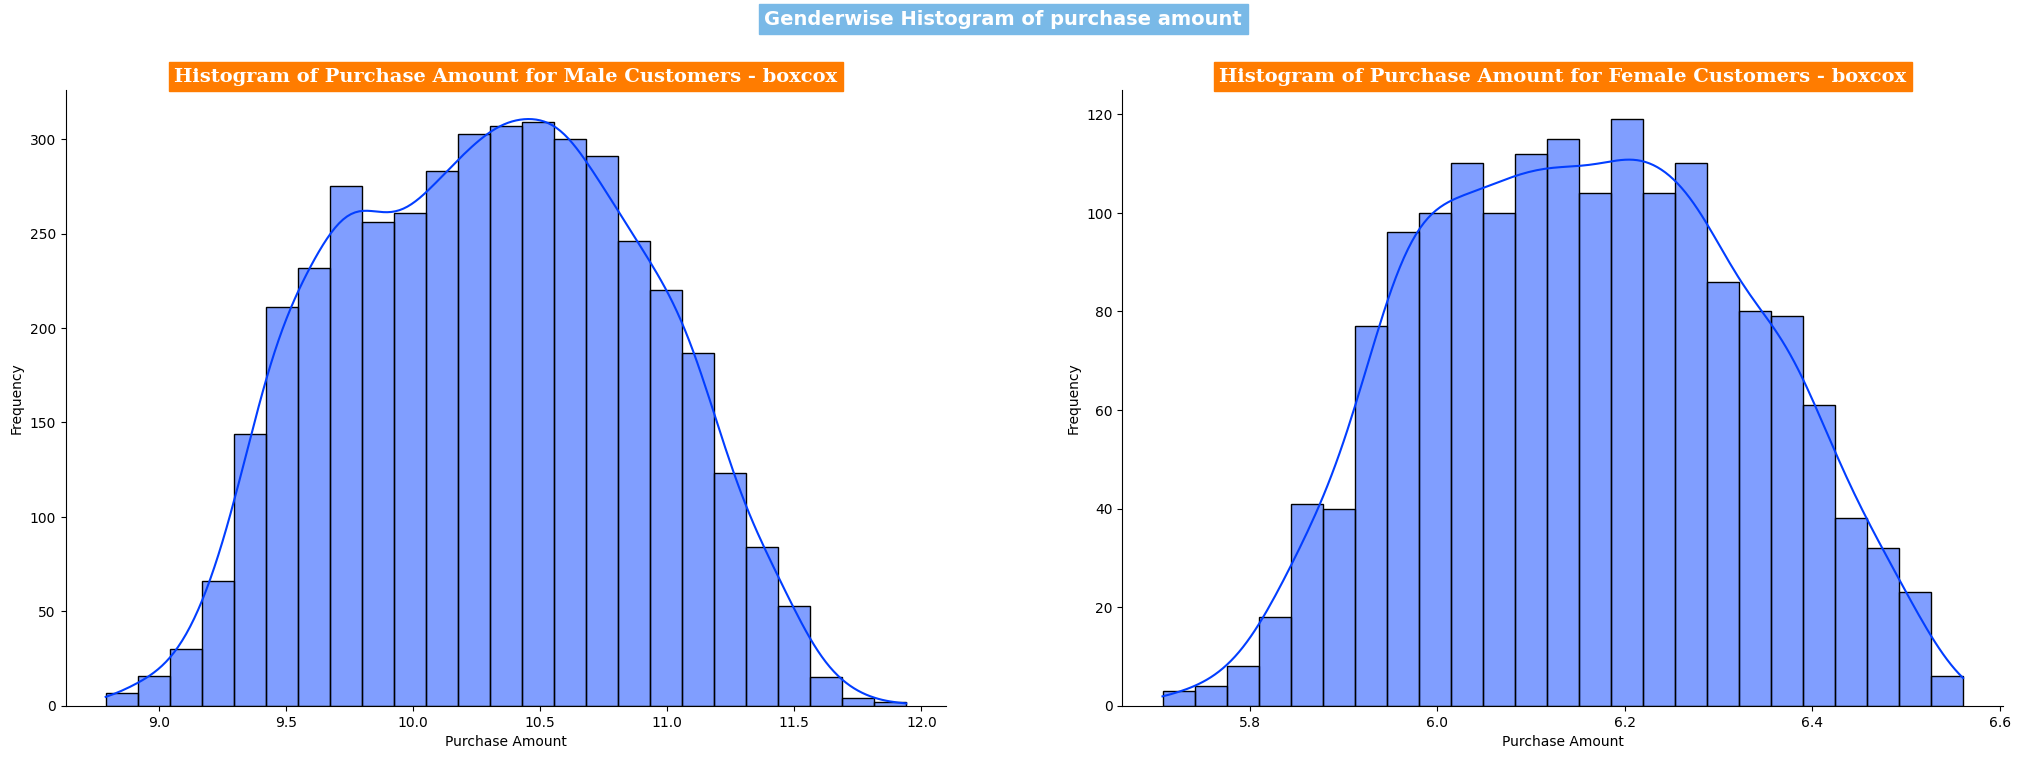

In [62]:
plt.figure(figsize=(25,8))
plt.style.use('default')
plt.suptitle("Genderwise Histogram of purchase amount",color='w',fontsize=14 , fontweight='bold',backgroundcolor=cp[2])
plt.subplot(1,2,1)
sns.histplot(transformed_data_male, bins=25,kde=True,color=cp2[0],cbar=True)
plt.title("Histogram of Purchase Amount for Male Customers - boxcox",fontfamily='serif',fontweight='bold',fontsize=14,
 backgroundcolor=cp2[1],color='w')
plt.xlabel("Purchase Amount")
plt.ylabel("Frequency")
plt.subplot(1,2,2)
sns.histplot(transformed_data_female, bins=25,kde=True,color=cp2[0])
plt.title("Histogram of Purchase Amount for Female Customers - boxcox",fontfamily='serif',fontweight='bold',fontsize=14,
 backgroundcolor=cp2[1],color='w')
sns.despine()
plt.xlabel("Purchase Amount")
plt.ylabel("Frequency")
plt.show()

In [63]:
import numpy as np
import scipy.stats as stats

# Assuming 'female_purchase' is already defined from your dataframe
n_female = len(female_purchase)
mean_female = female_purchase.mean()
std_female = female_purchase.std()

# 1. Set Confidence Level
confidence_level = 0.95
alpha = 1 - confidence_level

# 2. Find the Critical Z-Score
# For 95%, this finds the "Magic Number" approx 1.96
z_critical = stats.norm.ppf(1 - alpha/2)

# 3. Calculate Margin of Error
# Formula: Z_critical * (Standard Deviation / sqrt(n))
margin_of_error = z_critical * (std_female / np.sqrt(n_female))

# 4. Calculate the Confidence Interval
lower_bound = mean_female - margin_of_error
upper_bound = mean_female + margin_of_error

print(f"Female Sample Mean: {mean_female:.2f}")
print(f"Standard Deviation: {std_female:.2f}")
print(f"Critical Z-Score: {z_critical:.4f}")
print(f"95% Confidence Interval: ({lower_bound:.2f}, {upper_bound:.2f})")

Female Sample Mean: 712024.39
Standard Deviation: 807370.73
Critical Z-Score: 1.9600
95% Confidence Interval: (673255.48, 750793.30)


In [64]:
import numpy as np
import scipy.stats as stats
import pandas as pd

# 1. Load your data (assuming 'wm' is your dataframe)
# wm = pd.read_csv('walmart_data.csv') # Uncomment if you need to load it

# 2. Separate the data
female_purchase = wm[wm['Gender'] == 'F']['Purchase']
male_purchase = wm[wm['Gender'] == 'M']['Purchase']

# --- FEMALE CUSTOMERS ---
n_female = len(female_purchase)
mean_female = female_purchase.mean()
std_female = female_purchase.std()

# 95% Confidence Interval Calculation
z_critical = stats.norm.ppf(0.975)  # approx 1.96
margin_of_error_f = z_critical * (std_female / np.sqrt(n_female))

lower_bound_f = mean_female - margin_of_error_f
upper_bound_f = mean_female + margin_of_error_f

print("--- Female Customer Analysis ---")
print(f"Sample Mean:      ${mean_female:.2f}")
print(f"95% CI:           (${lower_bound_f:.2f}, ${upper_bound_f:.2f})")


# --- MALE CUSTOMERS ---
n_male = len(male_purchase)
mean_male = male_purchase.mean()
std_male = male_purchase.std()

# 95% Confidence Interval Calculation
# z_critical is the same for both (1.96)
margin_of_error_m = z_critical * (std_male / np.sqrt(n_male))

lower_bound_m = mean_male - margin_of_error_m
upper_bound_m = mean_male + margin_of_error_m

print("\n--- Male Customer Analysis ---")
print(f"Sample Mean:      ${mean_male:.2f}")
print(f"95% CI:           (${lower_bound_m:.2f}, ${upper_bound_m:.2f})")

--- Female Customer Analysis ---
Sample Mean:      $8734.57
95% CI:           ($8709.21, $8759.92)

--- Male Customer Analysis ---
Sample Mean:      $9437.53
95% CI:           ($9422.02, $9453.03)


In [65]:
wm.sample()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
23529,1003672,P00190742,M,36-45,5,C,4+,Single,3,10587


**Bootstrapping & Central Limit Theorem**

▶️〰️◀️

**Confidence intervals and distribution of the mean of the expenses based on customers Age**

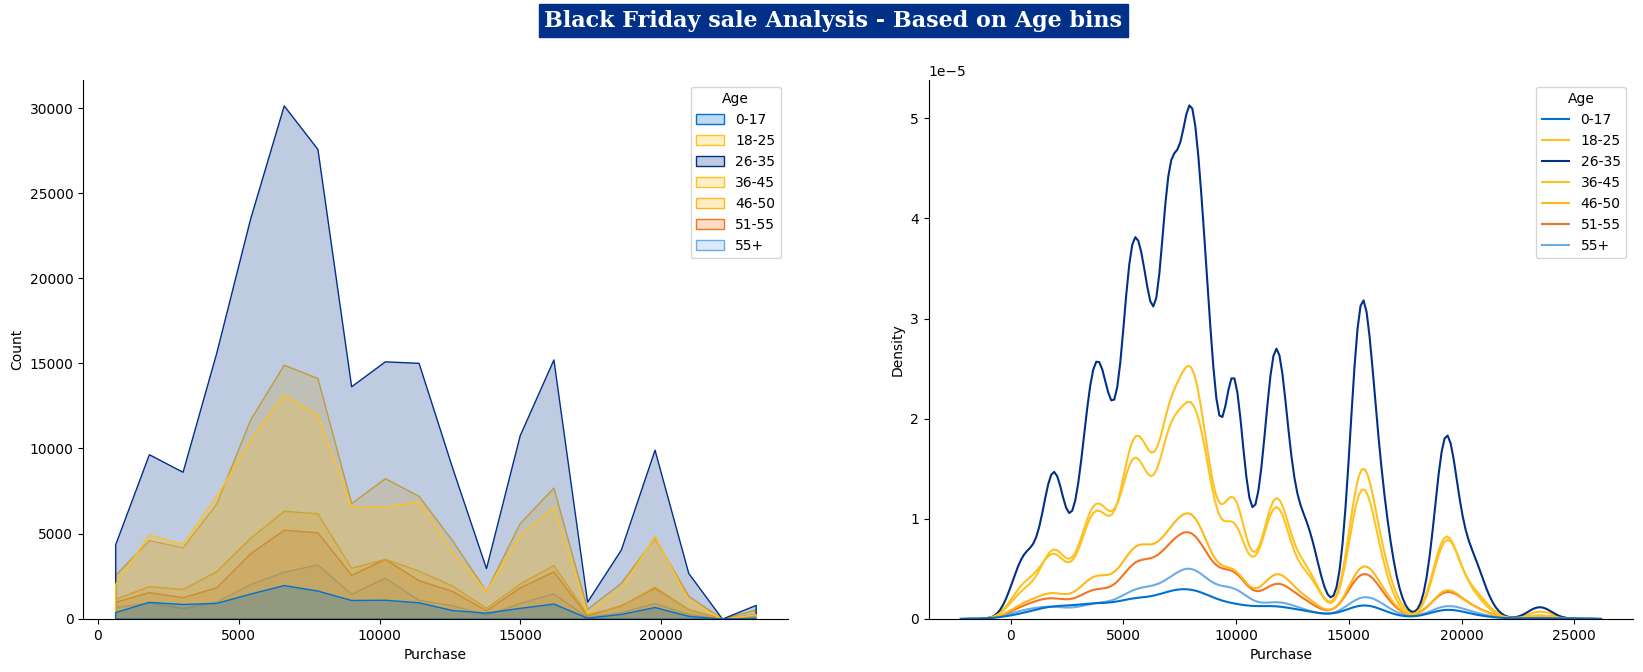

In [66]:
plt.figure(figsize=(20,7))
plt.suptitle('Black Friday sale Analysis - Based on Age bins',fontfamily='serif',fontweight='bold',
 fontsize=16,backgroundcolor=cp[0],color='w')
plt.subplot(1,2,1)
sns.histplot(data=wm, x = "Purchase", bins=20, hue = "Age",element='poly',palette=cp3)
plt.subplot(1,2,2)
sns.kdeplot(data=wm, x = "Purchase", hue = "Age",palette=cp3)
sns.despine()
plt.show()

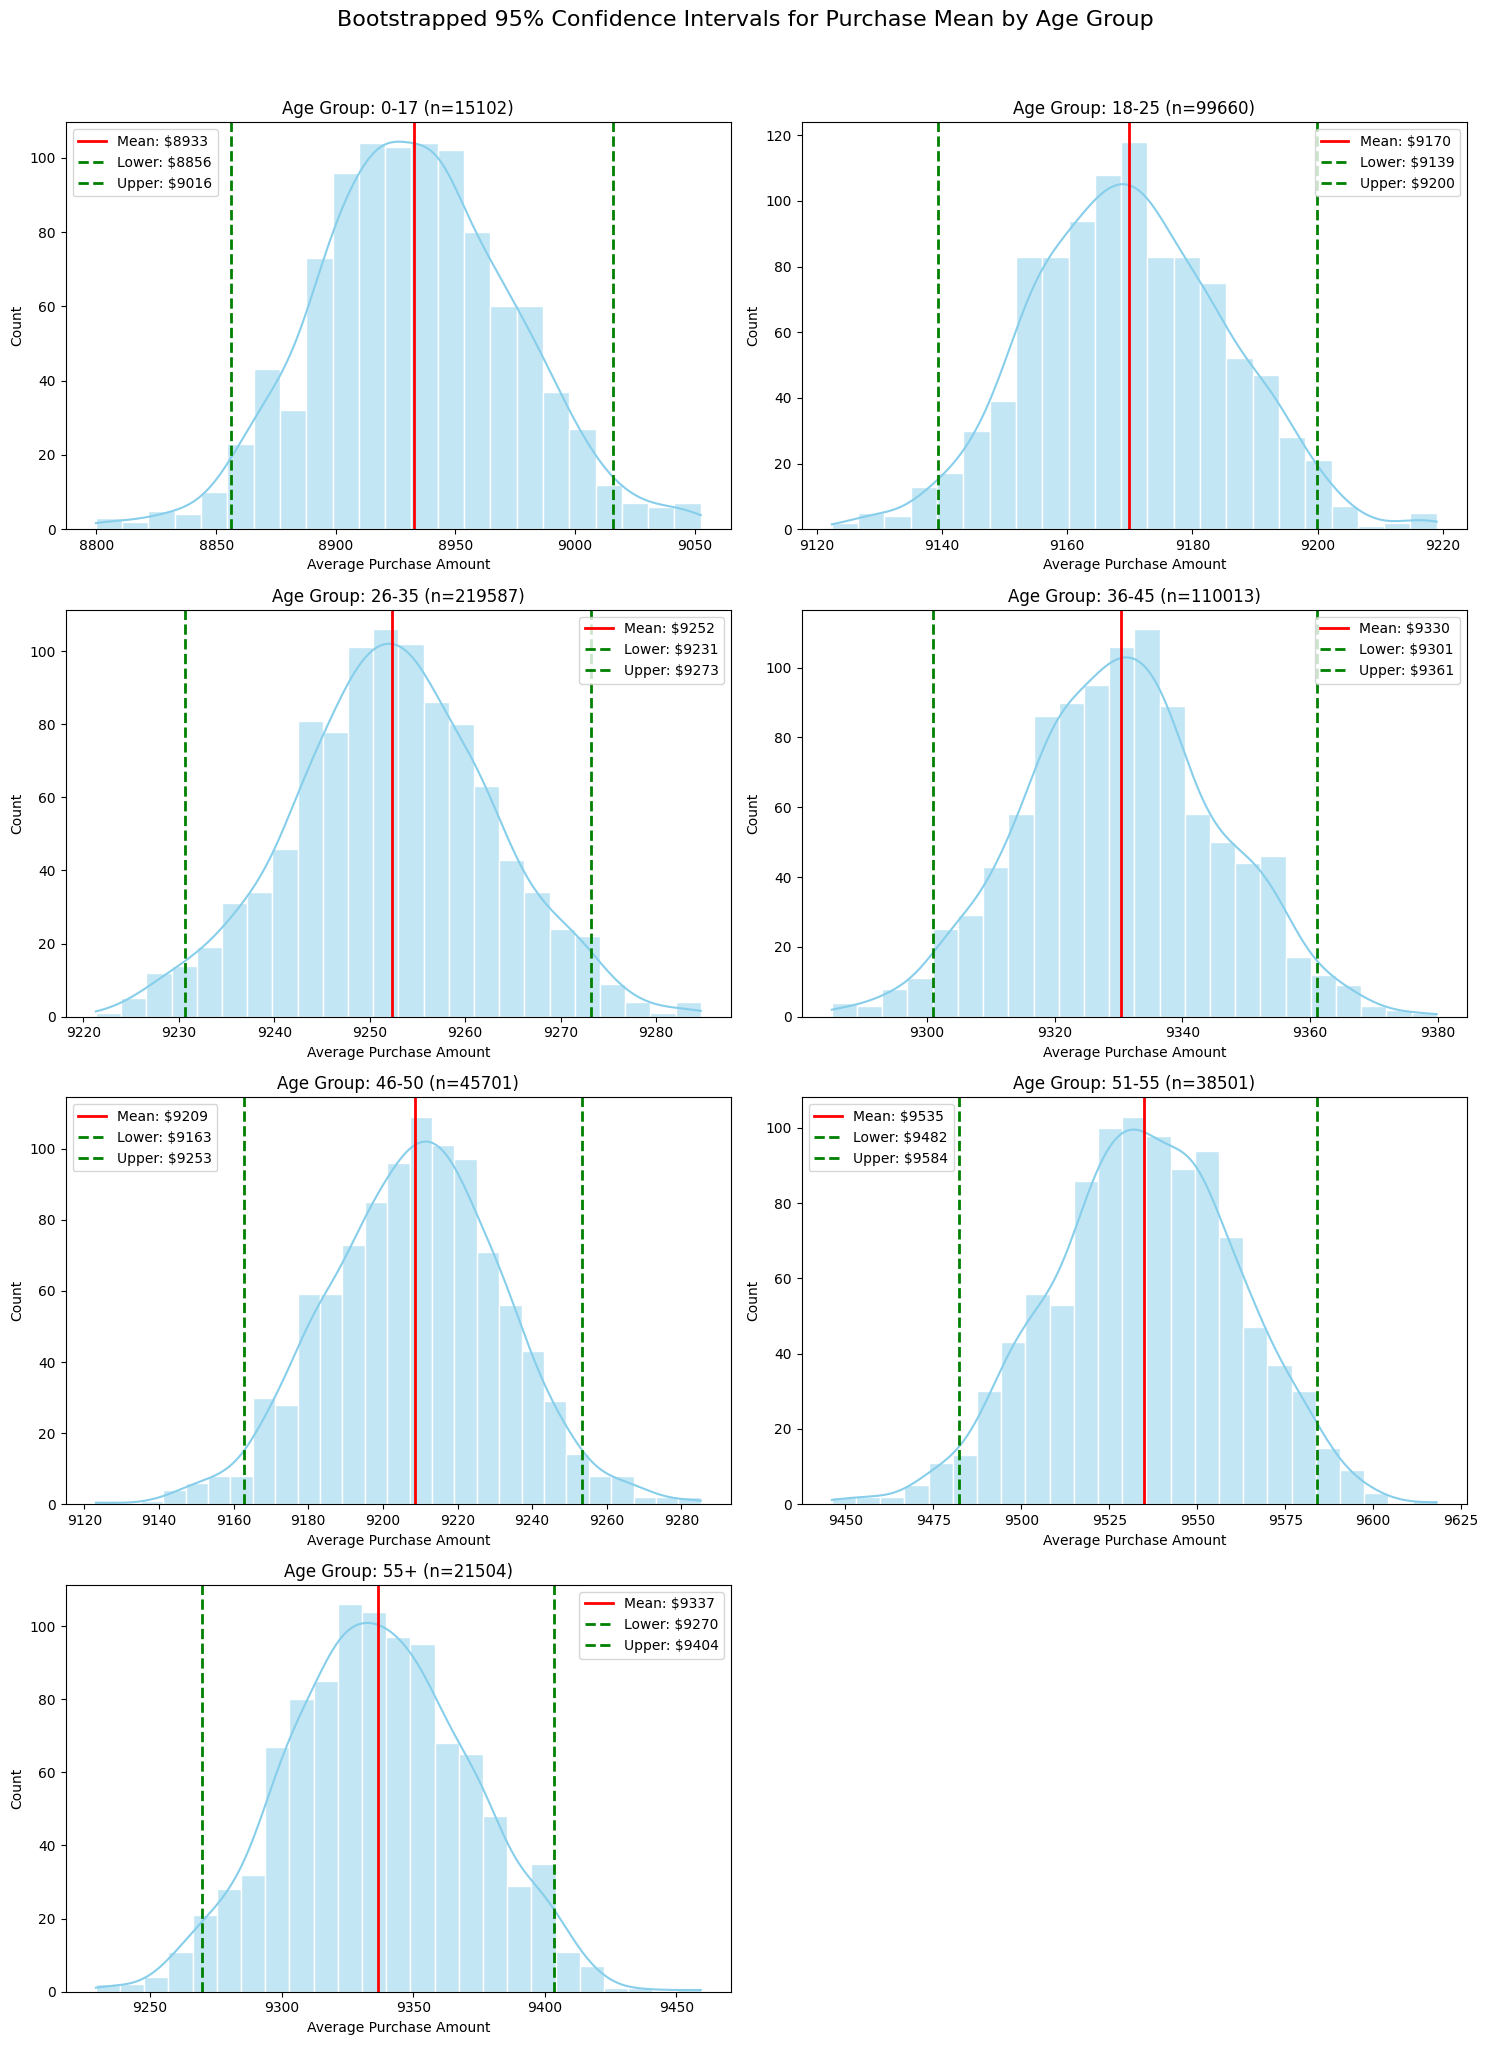

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset
# wm = pd.read_csv("walmart_data.csv") # Uncomment if needed
# data = wm # Assuming 'wm' is loaded

# Get unique Age groups and sort them
age_groups = sorted(wm['Age'].unique())

# Define parameters
n_iterations = 1000
confidence_level = 0.95
alpha = 1 - confidence_level

# Set up the figure grid
num_groups = len(age_groups)
cols = 2
rows = (num_groups + 1) // cols
plt.figure(figsize=(15, 5 * rows))
plt.suptitle('Bootstrapped 95% Confidence Intervals for Purchase Mean by Age Group', fontsize=16, y=1.02)

for i, age in enumerate(age_groups):
    # A. Get data for this age group
    age_data = wm[wm['Age'] == age]['Purchase'].values
    n_size = len(age_data)

    # B. Bootstrap Resampling
    bootstrapped_means = []
    for _ in range(n_iterations):
        # Resample with replacement
        sample = np.random.choice(age_data, size=n_size, replace=True)
        bootstrapped_means.append(np.mean(sample))

    # C. Calculate Confidence Interval
    lower_bound = np.percentile(bootstrapped_means, (alpha/2) * 100)
    upper_bound = np.percentile(bootstrapped_means, (1 - alpha/2) * 100)
    bootstrapped_mean = np.mean(bootstrapped_means)

    # D. Create the Plot
    ax = plt.subplot(rows, cols, i + 1)
    sns.histplot(bootstrapped_means, kde=True, color='skyblue', edgecolor='white', ax=ax)

    # Add vertical lines for Mean and CI
    ax.axvline(bootstrapped_mean, color='red', linestyle='-', linewidth=2, label=f'Mean: ${bootstrapped_mean:.0f}')
    ax.axvline(lower_bound, color='green', linestyle='--', linewidth=2, label=f'Lower: ${lower_bound:.0f}')
    ax.axvline(upper_bound, color='green', linestyle='--', linewidth=2, label=f'Upper: ${upper_bound:.0f}')

    # Formatting
    ax.set_title(f'Age Group: {age} (n={n_size})')
    ax.set_xlabel('Average Purchase Amount')
    ax.legend()

plt.tight_layout()
plt.show()

**Confidence intervals and distribution of the mean of the expenses based on female and male customers**

In [73]:
def bootstrapping(title,data1,data2,sample_size,ntimes,ci):

    plt.figure(figsize=(20,8))
    plt.style.use('seaborn-v0_8-bright')
    plt.suptitle(f'Classfification of Customers based on {title}',
              fontfamily='serif', fontweight='bold', fontsize=16, backgroundcolor='#ffb81c', color='w')

    ci=ci/100

    data1_sample_means = [np.mean(np.random.choice(data1,sample_size)) for i in range(ntimes)]

    data2_sample_means = []
    for i in range(ntimes):
        dsm2 = np.mean(np.random.choice(data2,sample_size))
        data2_sample_means.append(dsm2)


    # male_data_sample_means parameters
    mean1 = np.mean(data1_sample_means)
    sigma1 = np.std(data1_sample_means)
    stderr1 = stats.sem(data1_sample_means)   # sem auto calculates the std.err for mean

    lower_limit_1 = norm.ppf((1-ci)/2) * sigma1 + mean1
    upper_limit_1 = norm.ppf(ci+(1-ci)/2) * sigma1 + mean1

    # For female_data_sample_means parameters
    mean2 = np.mean(data2_sample_means)
    sigma2 = np.std(data2_sample_means)
    stderr2 = stats.sem(data2_sample_means)

    lower_limit_2 = norm.ppf((1-ci)/2) * sigma2 + mean2
    upper_limit_2 = norm.ppf(ci + (1-ci)/2) * sigma2 + mean2

    # plot1 # for mu = alt+230
    sns.kdeplot(data = data1_sample_means, color=cp2[0], fill = True, linewidth = 2)
    label_mean1 = (f" μ (Males):  {mean1:.2f}")
    plt.axvline(mean1, color = 'darkblue', linestyle = 'solid', linewidth = 2, label=label_mean1)
    label_limits1=(f"Lower Limit(M): {lower_limit_1:.2f}\nUpper Limit(M):  {upper_limit_1:.2f}")
    plt.axvline(lower_limit_1, color = 'dodgerblue', linestyle = 'dashdot', linewidth = 2, label=label_limits1)
    plt.axvline(upper_limit_1, color = 'dodgerblue', linestyle = 'dashdot', linewidth = 2)

    #plot2
    sns.kdeplot(data = data2_sample_means, color=cp2[1], fill = True, linewidth = 2)
    sns.despine()
    label_mean2 = (f" μ (Females): {mean2:.2f}")
    plt.axvline(mean2, color = 'gold', linestyle = 'solid', linewidth = 2, label=label_mean2)
    label_limits2=(f"Lower Limit(F): {lower_limit_2:.2f}\nUpper Limit(F): {upper_limit_2:.2f}")
    plt.axvline(lower_limit_2, color = 'goldenrod', linestyle = 'dashdot', linewidth = 2, label=label_limits2)
    plt.axvline(upper_limit_2, color = 'goldenrod', linestyle = 'dashdot', linewidth = 2)

    plt.title(f"Sample Size: {sample_size} with Confidence Interval: {ci*100}% ",
              #, Male Avg: {np.round(mean1, 2)} , Male SME: {np.round(stderr1, 2)} ,"
              #f" Female Avg: {np.round(mean2, 2)} , Female SME: {np.round(stderr2, 2)}
          fontfamily='serif', fontweight='bold', fontsize=14, backgroundcolor='#003087', color='w')

    plt.legend()
    plt.xlabel('Purchase Amount')
    plt.ylabel('Probability Density')

    return round(mean1,2), round(mean2,2), round(lower_limit_1,2), round(upper_limit_1,2), round(lower_limit_2,2), round(upper_limit_2,2)

In [74]:
sample_male = male_purchase.sample(500)
z_score_90 = norm.ppf(0.9).round(2)
z_score_95 = norm.ppf(0.95).round(2)
z_score_99 = norm.ppf(0.99).round(2)
print(f"Male purchase amount - Confidence interval :")
male_pop_mean = np.mean(sample_male).round(2)
print(f"Population purchase mean for male : {male_pop_mean}")
pop_std_dev = np.round(np.std(sample_male),2)
print(f"Population purchase standard deviation for male : {pop_std_dev}")
print()
se = pop_std_dev/np.sqrt(500)
x1 =  (male_pop_mean - (z_score_90 * se)).round(2)
x2 =  (male_pop_mean + (z_score_90 * se)).round(2)
print(f"The 90% confidence interval --> $ {x1} to $ {x2}")
x1 =  (male_pop_mean - (z_score_95 * se)).round(2)
x2 =  (male_pop_mean + (z_score_95 * se)).round(2)
print(f"The 95% confidence interval --> $ {x1} to $ {x2}")
x1 =  (male_pop_mean - (z_score_99 * se)).round(2)
x2 =  (male_pop_mean + (z_score_99 * se)).round(2)
print(f"The 99% confidence interval --> $ {x1} to $ {x2}")

Male purchase amount - Confidence interval :
Population purchase mean for male : 9814.3
Population purchase standard deviation for male : 5129.17

The 90% confidence interval --> $ 9520.69 to $ 10107.91
The 95% confidence interval --> $ 9438.11 to $ 10190.49
The 99% confidence interval --> $ 9279.84 to $ 10348.76


In [75]:
sample_female = female_purchase.sample(500)
z_score_90 = norm.ppf(0.9).round(2)
z_score_95 = norm.ppf(0.95).round(2)
z_score_99 = norm.ppf(0.99).round(2)
print(f"Female purchase amount - Confidence interval :")
male_pop_mean = np.mean(sample_female).round(2)
print(f"Population purchase mean for Female : {male_pop_mean}")
pop_std_dev = np.round(np.std(sample_female),2)
print(f"Population purchase standard deviation for Female : {pop_std_dev}")
print()
se = pop_std_dev/np.sqrt(500)
x1 =  (male_pop_mean - (z_score_90 * se)).round(2)
x2 =  (male_pop_mean + (z_score_90 * se)).round(2)
print(f"The 90% confidence interval --> $ {x1} to $ {x2}")
x1 =  (male_pop_mean - (z_score_95 * se)).round(2)
x2 =  (male_pop_mean + (z_score_95 * se)).round(2)
print(f"The 95% confidence interval --> $ {x1} to $ {x2}")
x1 =  (male_pop_mean - (z_score_99 * se)).round(2)
x2 =  (male_pop_mean + (z_score_99 * se)).round(2)
print(f"The 99% confidence interval --> $ {x1} to $ {x2}")

Female purchase amount - Confidence interval :
Population purchase mean for Female : 8601.01
Population purchase standard deviation for Female : 4692.55

The 90% confidence interval --> $ 8332.39 to $ 8869.63
The 95% confidence interval --> $ 8256.84 to $ 8945.18
The 99% confidence interval --> $ 8112.04 to $ 9089.98


,Gender,Sample Size,Lower Limit,Upper Limit,Sample Mean,Confidence Interval,Range
0,M,50,8246.06,10633.33,9439.69,90,2387.27
1,F,50,7634.03,9849.14,8741.59,90,2215.11
2,M,500,9060.98,9813.84,9437.41,90,752.86
3,F,500,8386.84,9081.37,8734.11,90,694.53
4,M,5000,9319.24,9556.53,9437.89,90,237.29
5,F,5000,8624.58,8846.57,8735.57,90,221.99
6,M,50000,9399.90,9474.52,9437.21,90,74.62
7,F,50000,8699.54,8769.62,8734.58,90,70.08
8,M,100000,9410.93,9464.46,9437.69,90,53.53
9,F,100000,8709.38,8759.45,8734.41,90,50.07


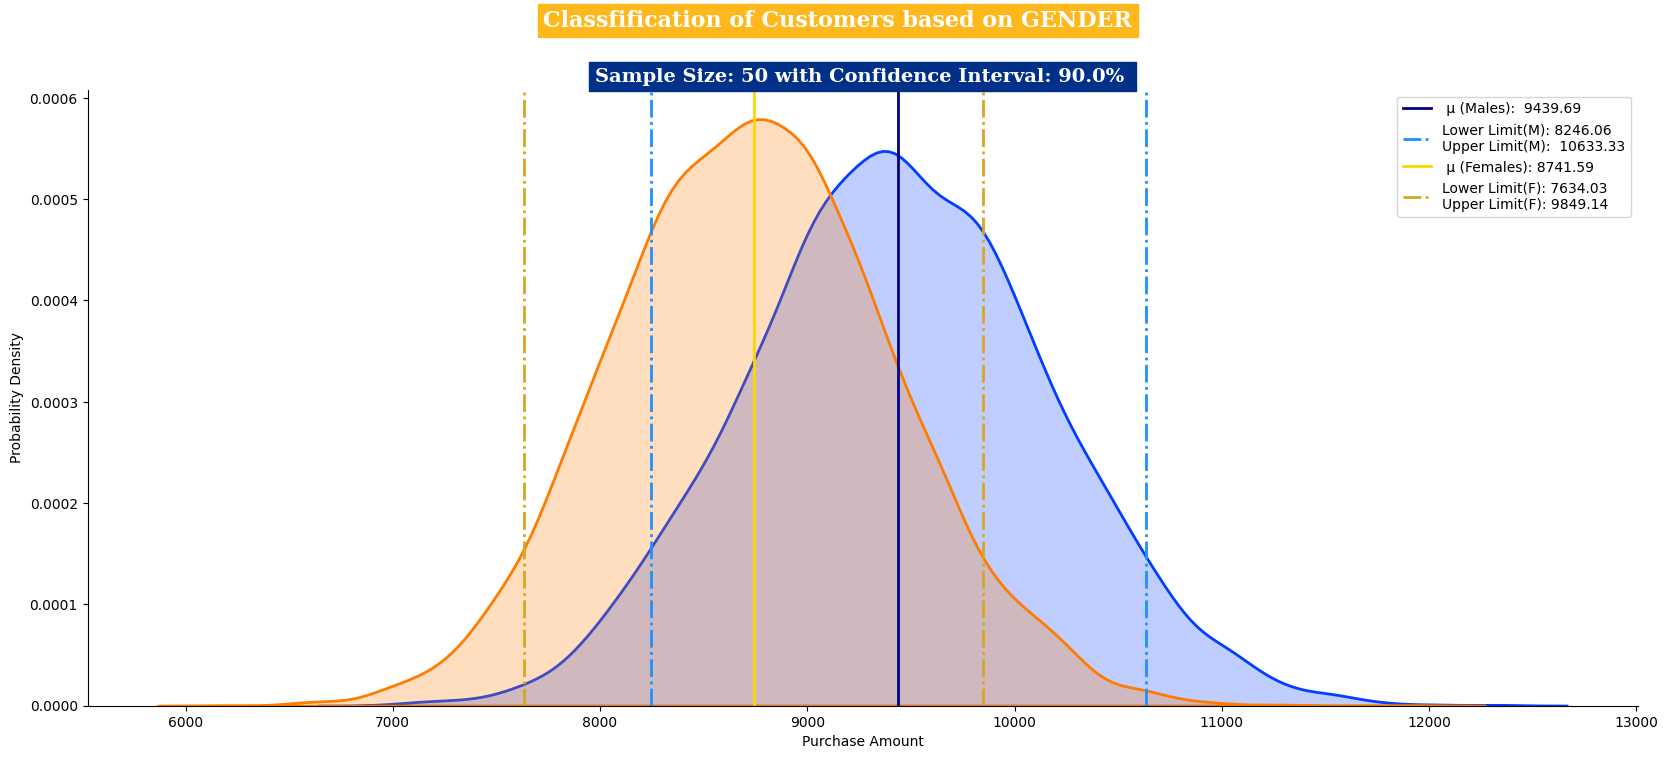

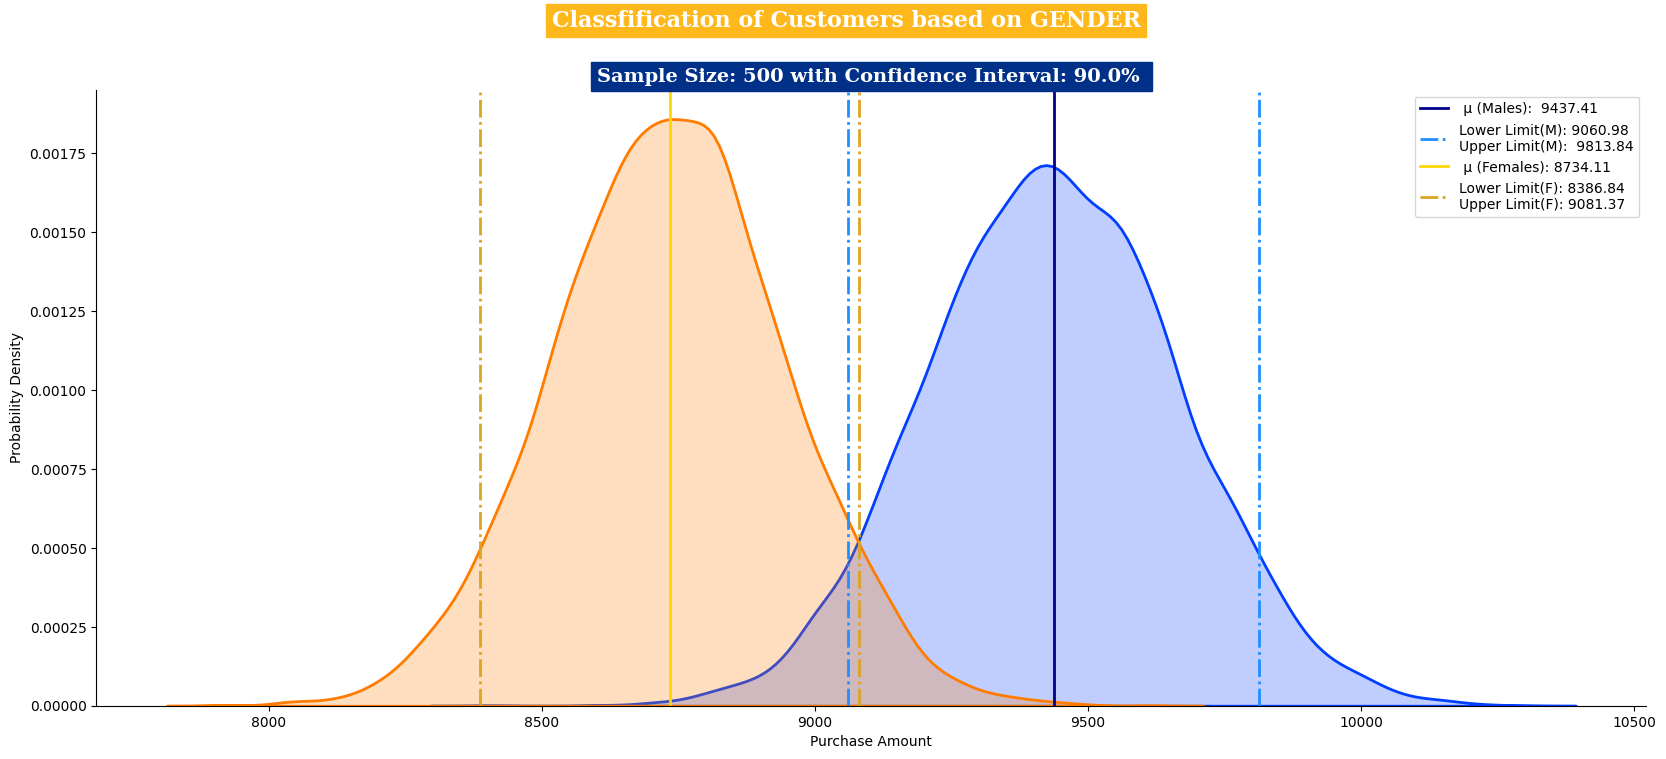

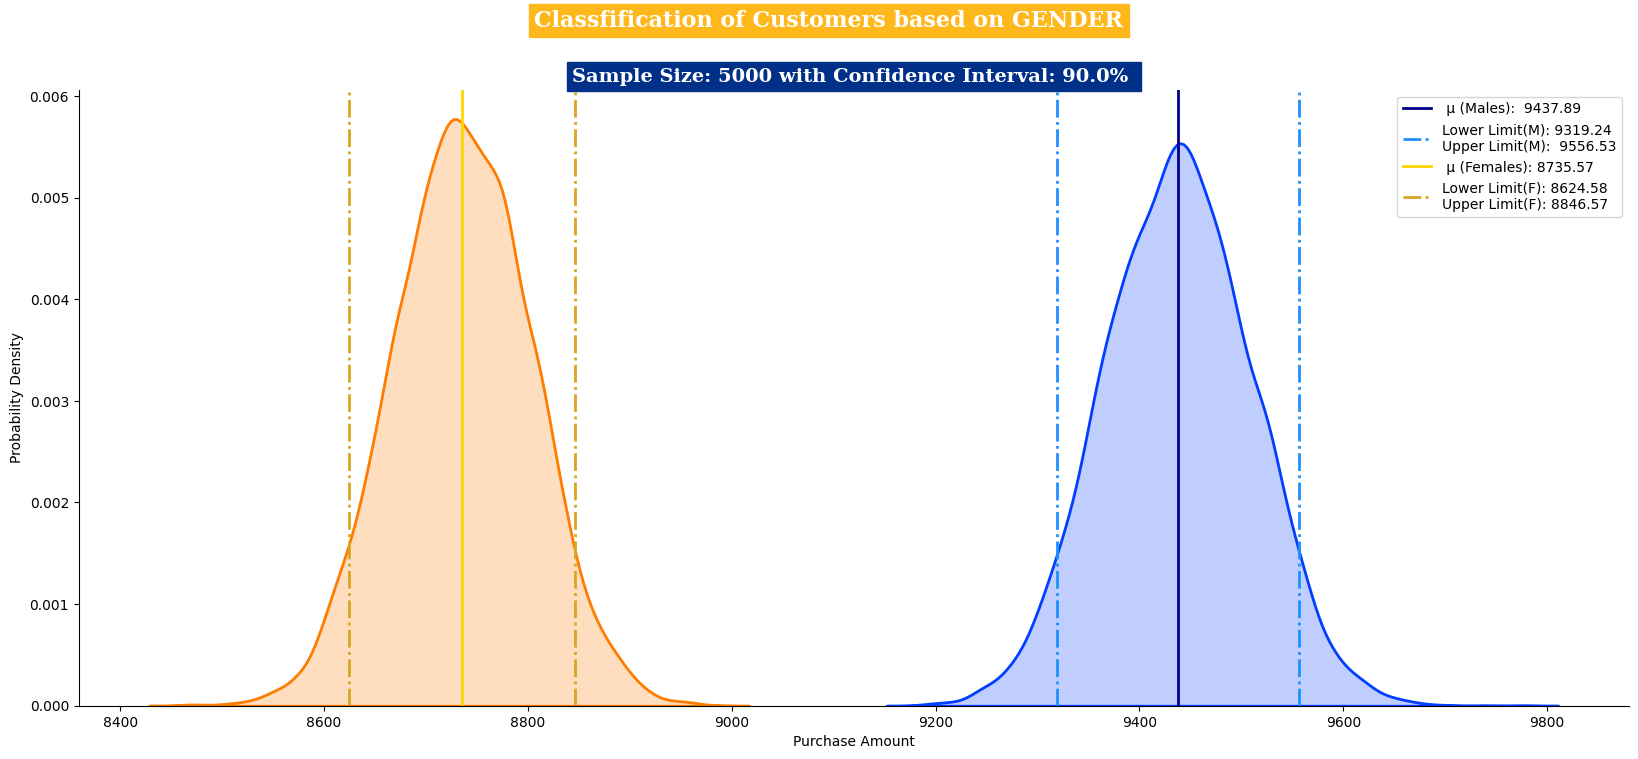

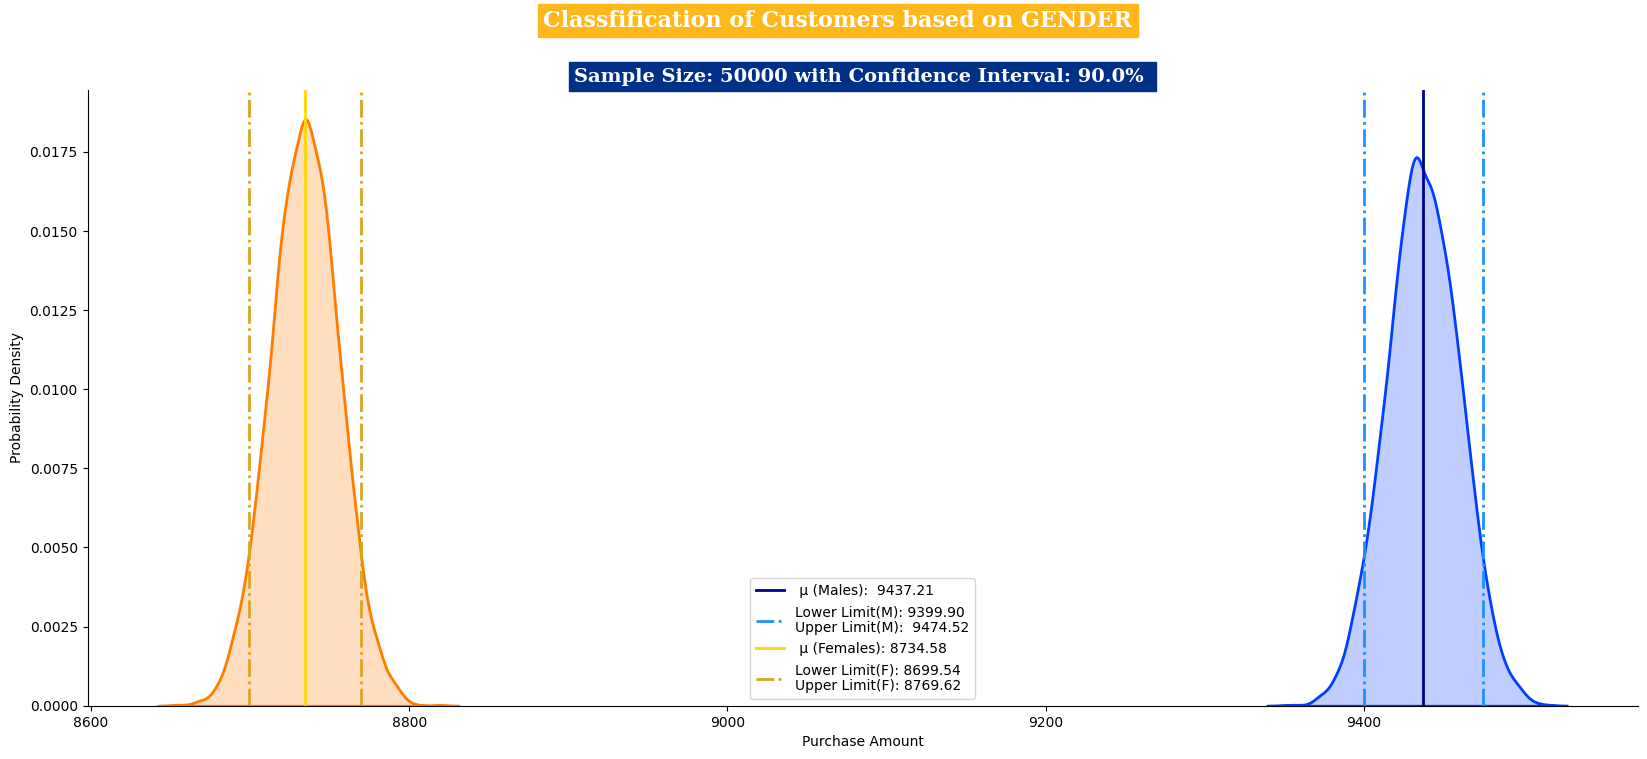

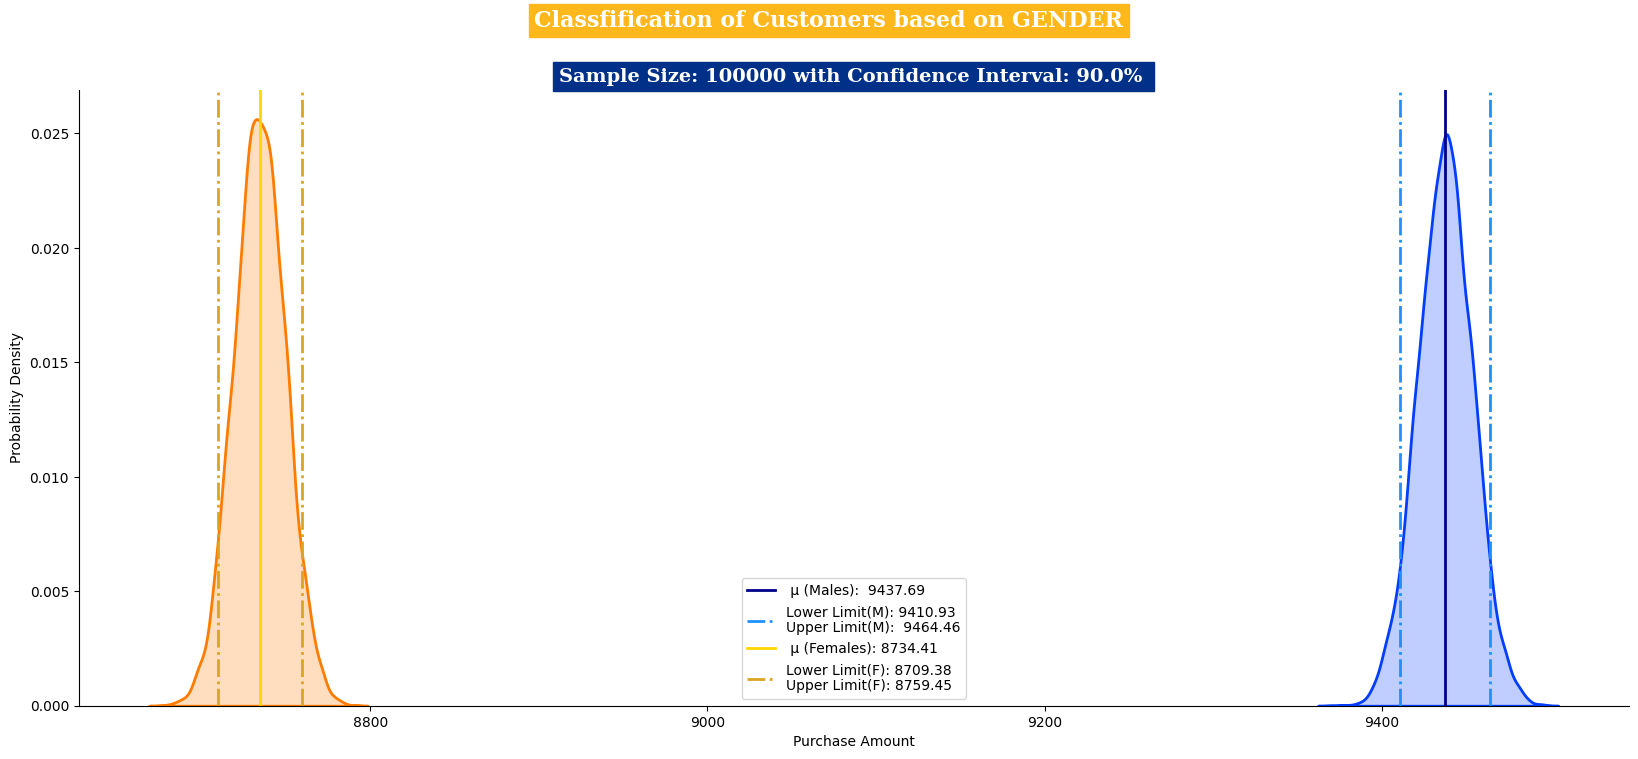

In [76]:
sample_sizes = [50,500,5000,50000,100000]
ci = [90]
ntimes = 10000

df = pd.DataFrame(columns=['Gender','Sample Size','Lower Limit','Upper Limit','Sample Mean','Confidence Interval','Range'])

for j in ci:
    for i in sample_sizes:
        m_avg, f_avg, ll_m, ul_m, ll_f, ul_f = bootstrapping('GENDER',male_purchase, female_purchase, i, ntimes, j)

        df.loc[len(df.index)] = ['M' , i , ll_m , ul_m , m_avg , j , (ul_m - ll_m)]
        df.loc[len(df.index)] = ['F' , i , ll_f , ul_f , f_avg , j , (ul_f - ll_f)]

df

,Gender,Sample Size,Lower Limit,Upper Limit,Sample Mean,Confidence Interval,Range
0,M,50,8012.86,10878.67,9445.76,95,2865.81
1,F,50,7419.45,10057.72,8738.59,95,2638.27
2,M,500,8988.51,9885.67,9437.09,95,897.16
3,F,500,8314.28,9150.62,8732.45,95,836.34
4,M,5000,9294.31,9580.15,9437.23,95,285.84
5,F,5000,8601.31,8867.26,8734.28,95,265.95
6,M,50000,9393.56,9482.75,9438.15,95,89.19
7,F,50000,8692.59,8776.61,8734.60,95,84.02
8,M,100000,9405.55,9468.96,9437.26,95,63.41
9,F,100000,8704.95,8764.64,8734.79,95,59.69


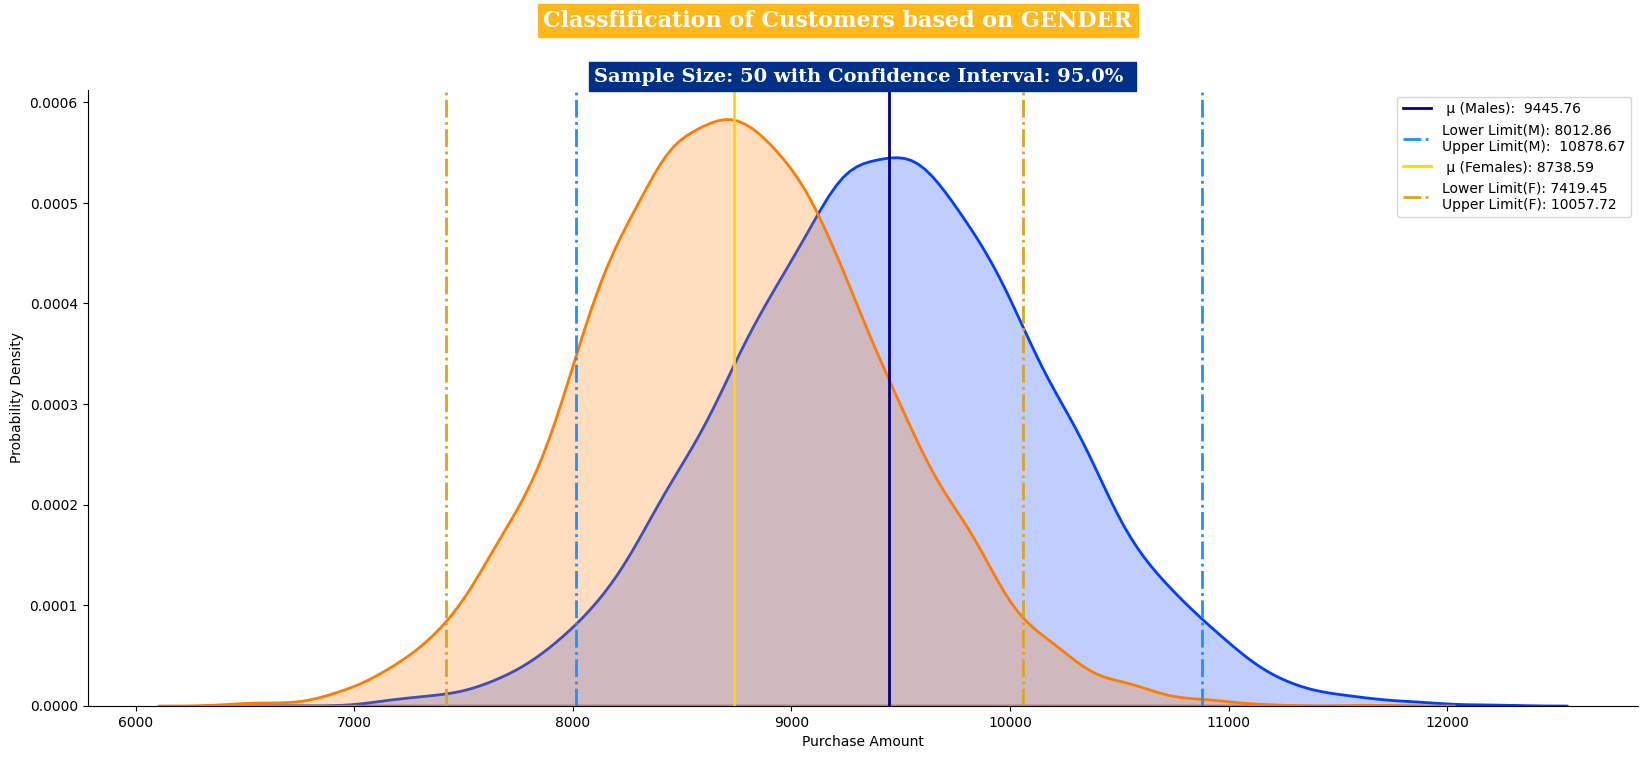

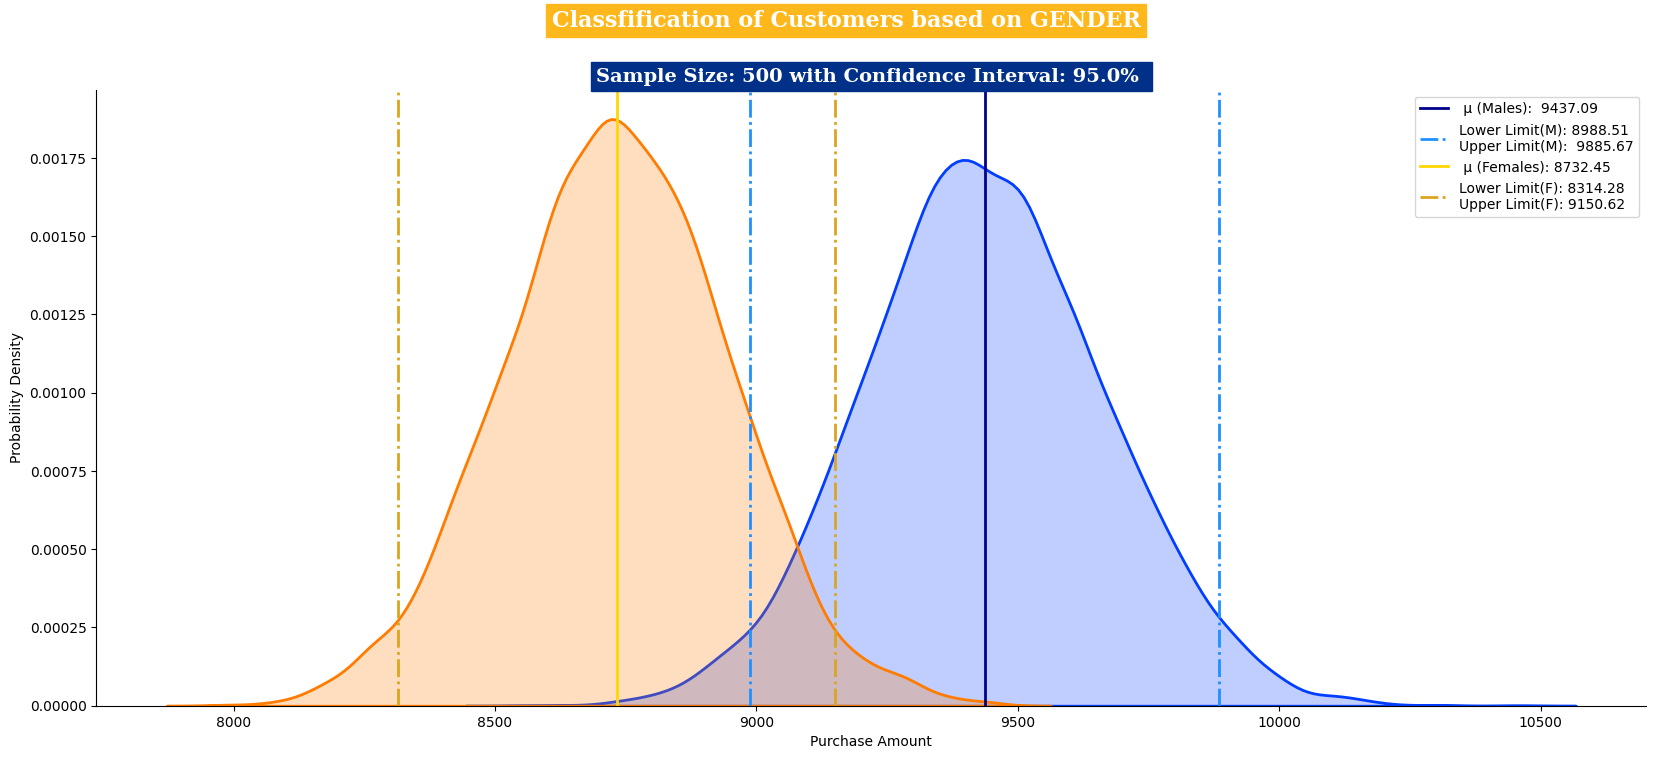

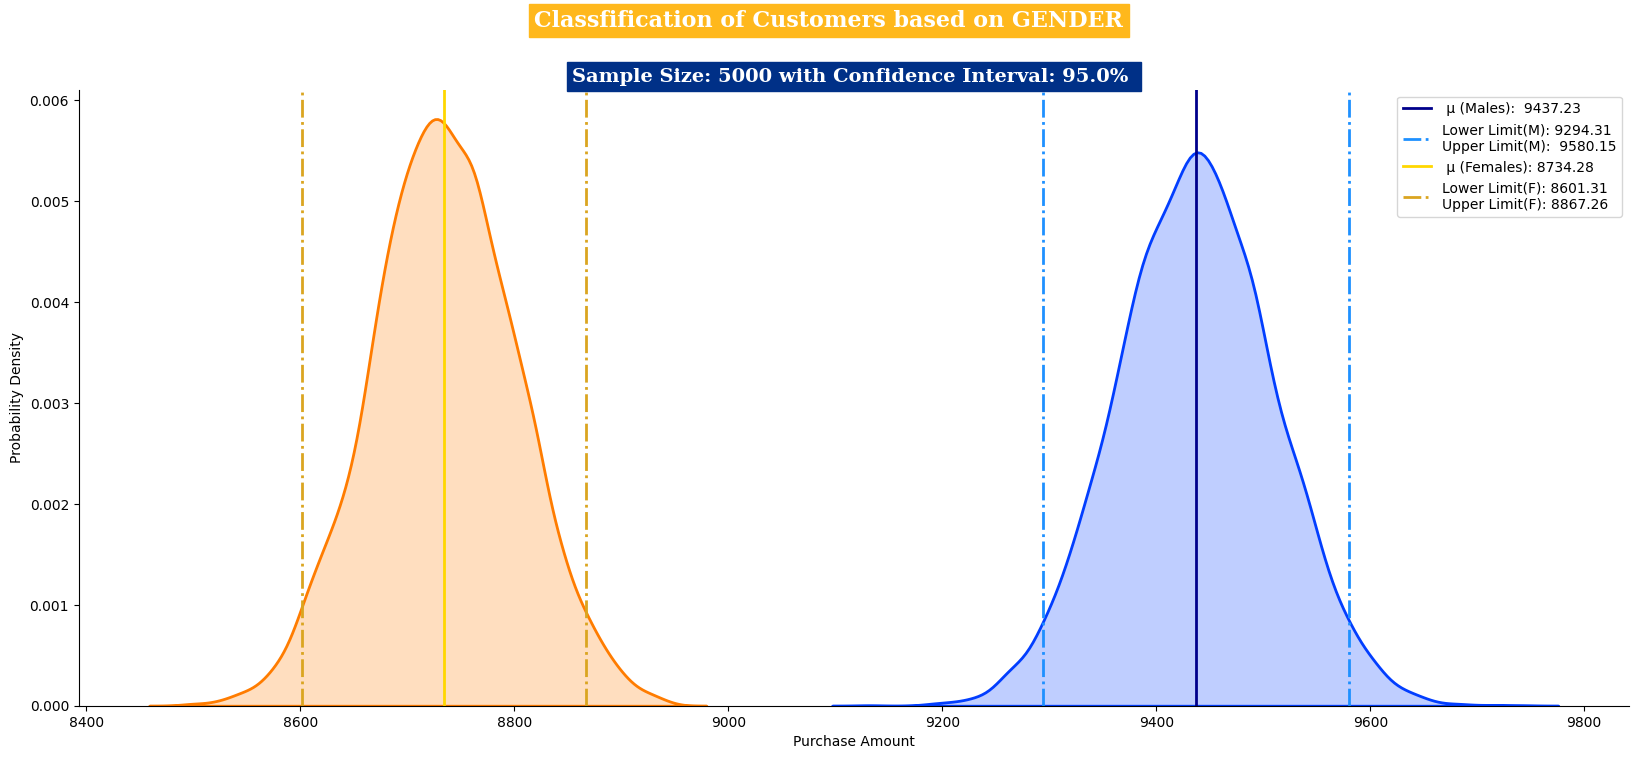

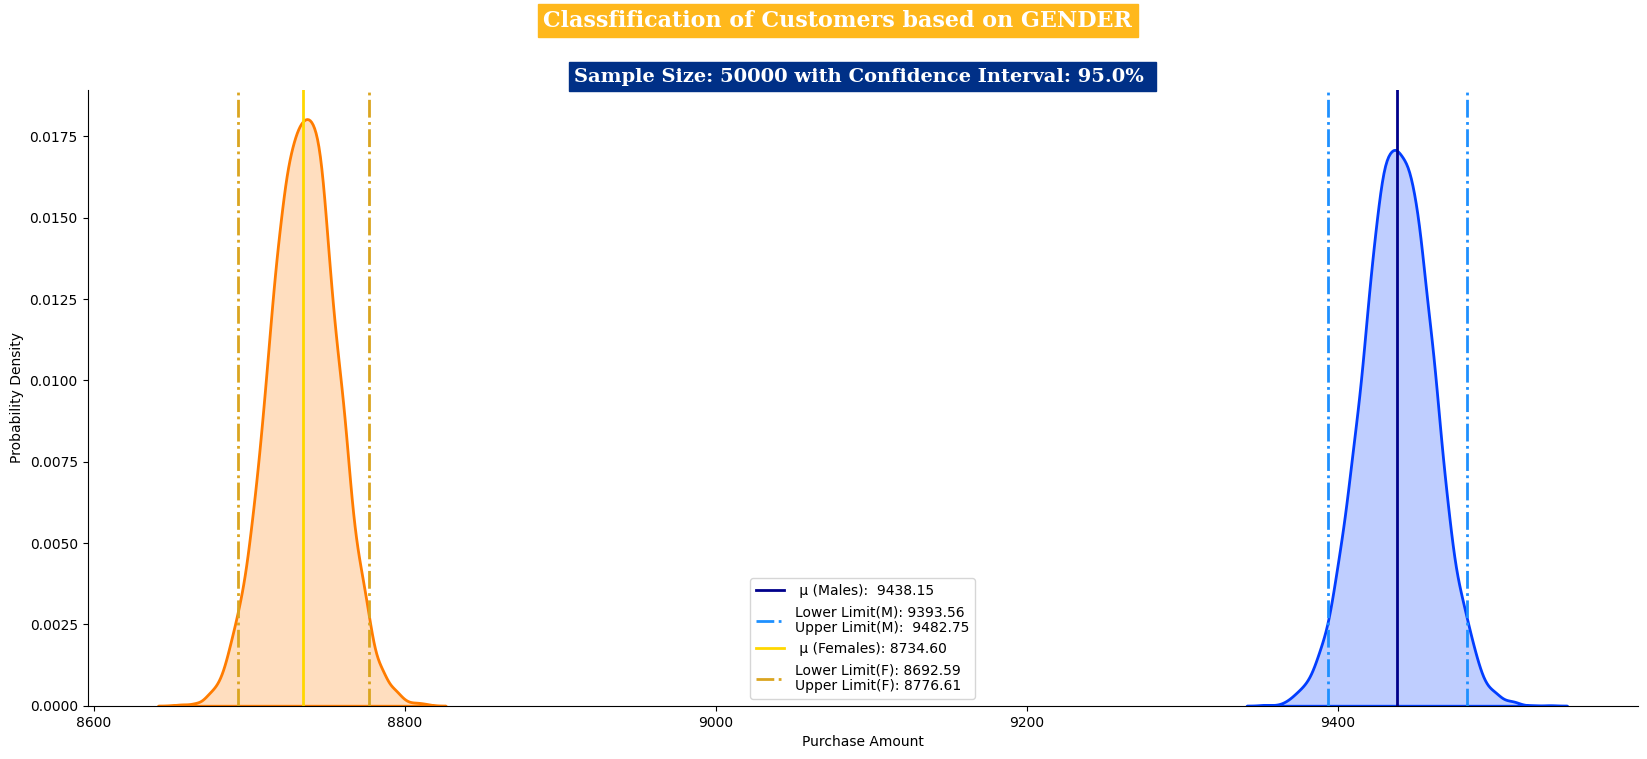

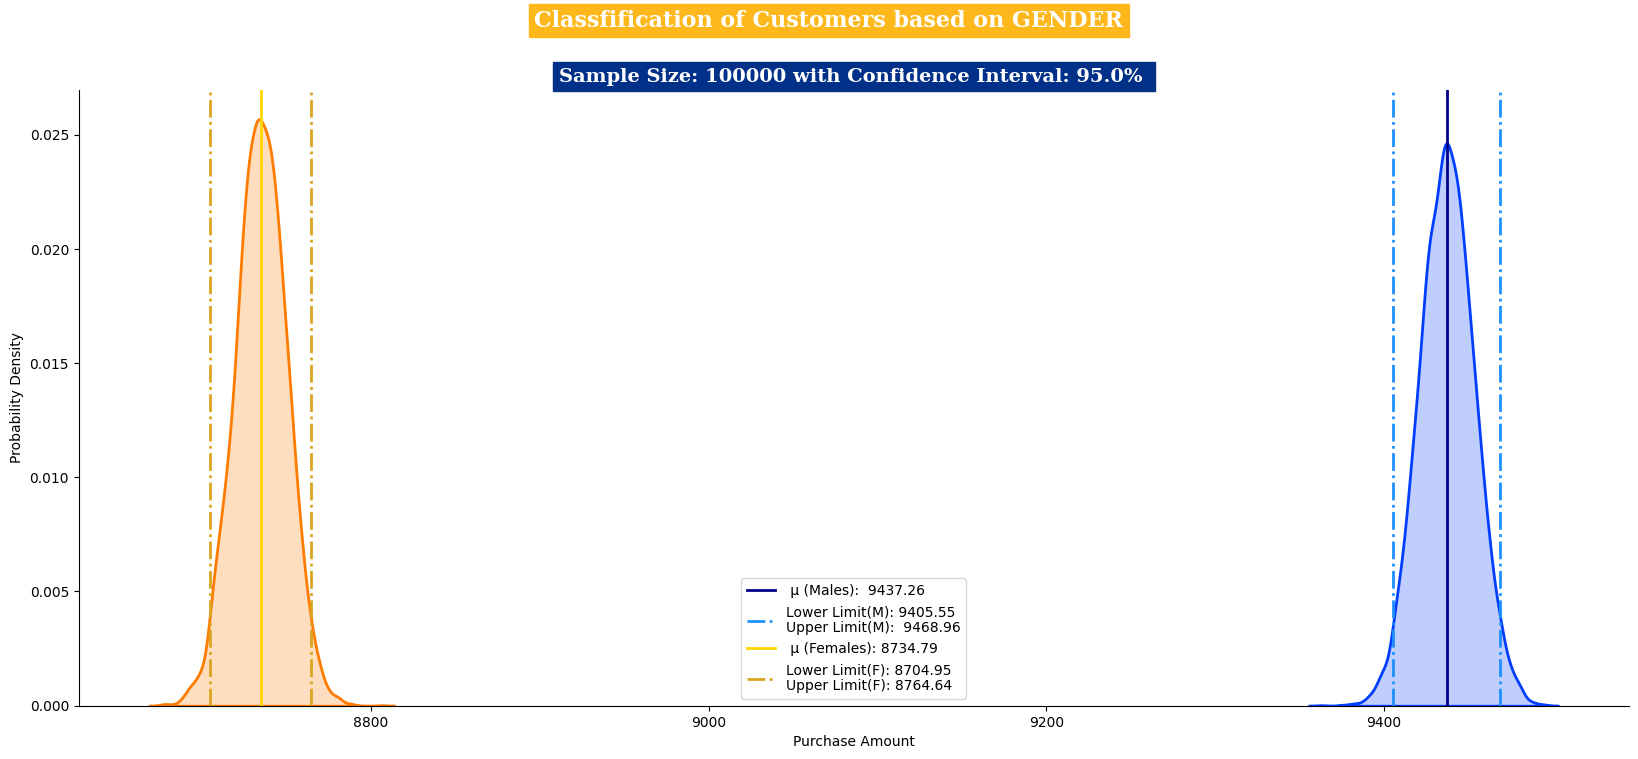

In [77]:
sample_sizes = [50,500,5000,50000,100000]
ci = [95]
ntimes = 10000

df = pd.DataFrame(columns=['Gender','Sample Size','Lower Limit','Upper Limit','Sample Mean','Confidence Interval','Range'])

for j in ci:
    for i in sample_sizes:
        m_avg, f_avg, ll_m, ul_m, ll_f, ul_f = bootstrapping('GENDER',male_purchase, female_purchase, i, ntimes, j)

        df.loc[len(df.index)] = ['M' , i , ll_m , ul_m , m_avg , j , (ul_m - ll_m)]
        df.loc[len(df.index)] = ['F' , i , ll_f , ul_f , f_avg , j , (ul_f - ll_f)]

df

,Gender,Sample Size,Lower Limit,Upper Limit,Sample Mean,Confidence Interval,Range
0,M,50,7584.34,11287.66,9436.00,99,3703.32
1,F,50,7006.48,10455.07,8730.78,99,3448.59
2,M,500,8846.83,10029.55,9438.19,99,1182.72
3,F,500,8181.70,9286.44,8734.07,99,1104.74
4,M,5000,9250.07,9625.38,9437.73,99,375.31
5,F,5000,8561.81,8909.50,8735.65,99,347.69
6,M,50000,9377.76,9497.09,9437.43,99,119.33
7,F,50000,8679.21,8789.83,8734.52,99,110.62
8,M,100000,9396.17,9479.29,9437.73,99,83.12
9,F,100000,8696.01,8773.39,8734.70,99,77.38


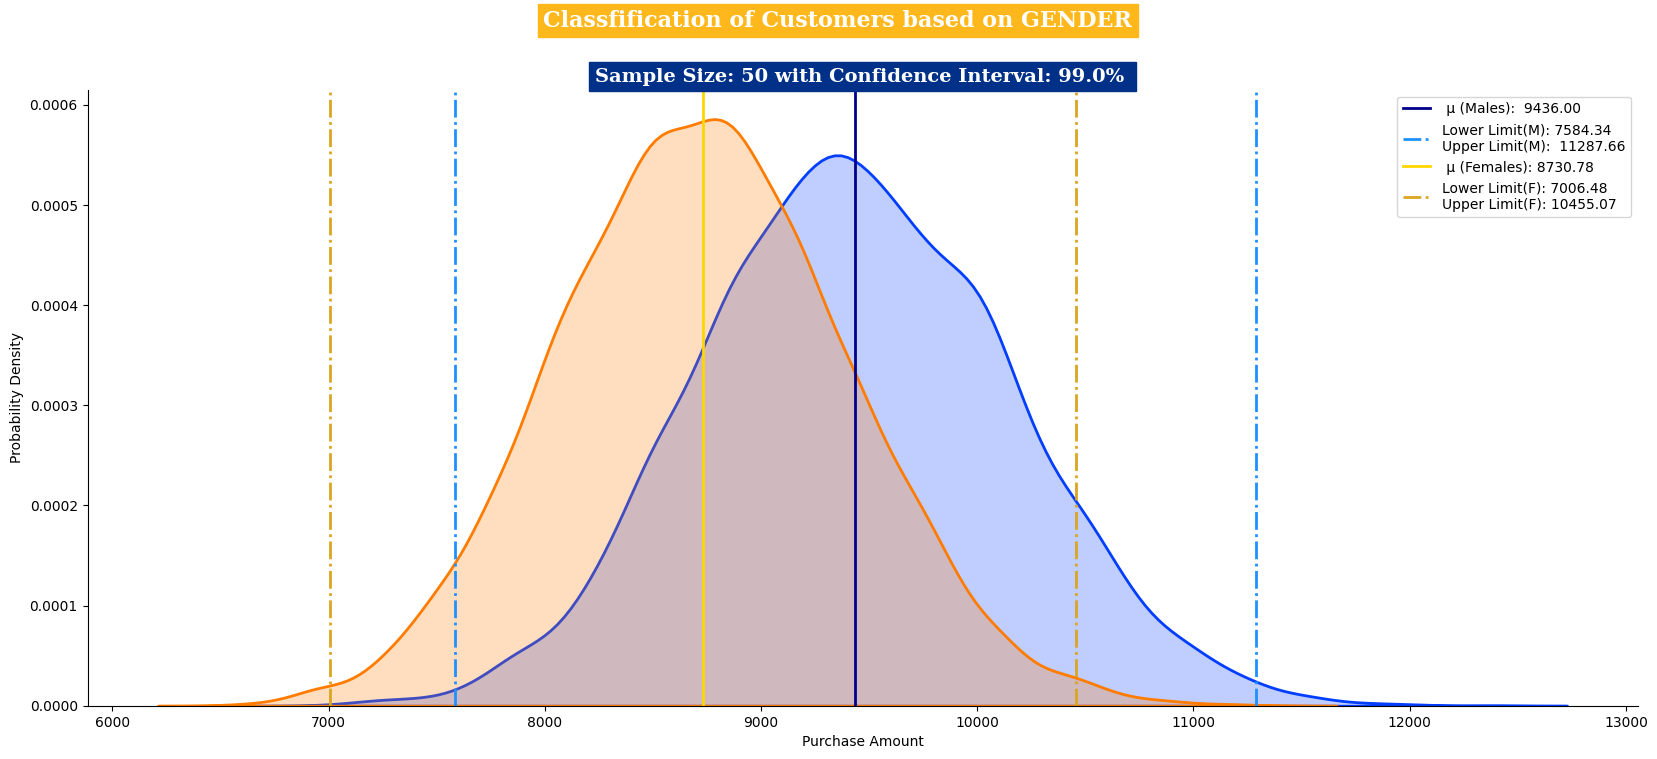

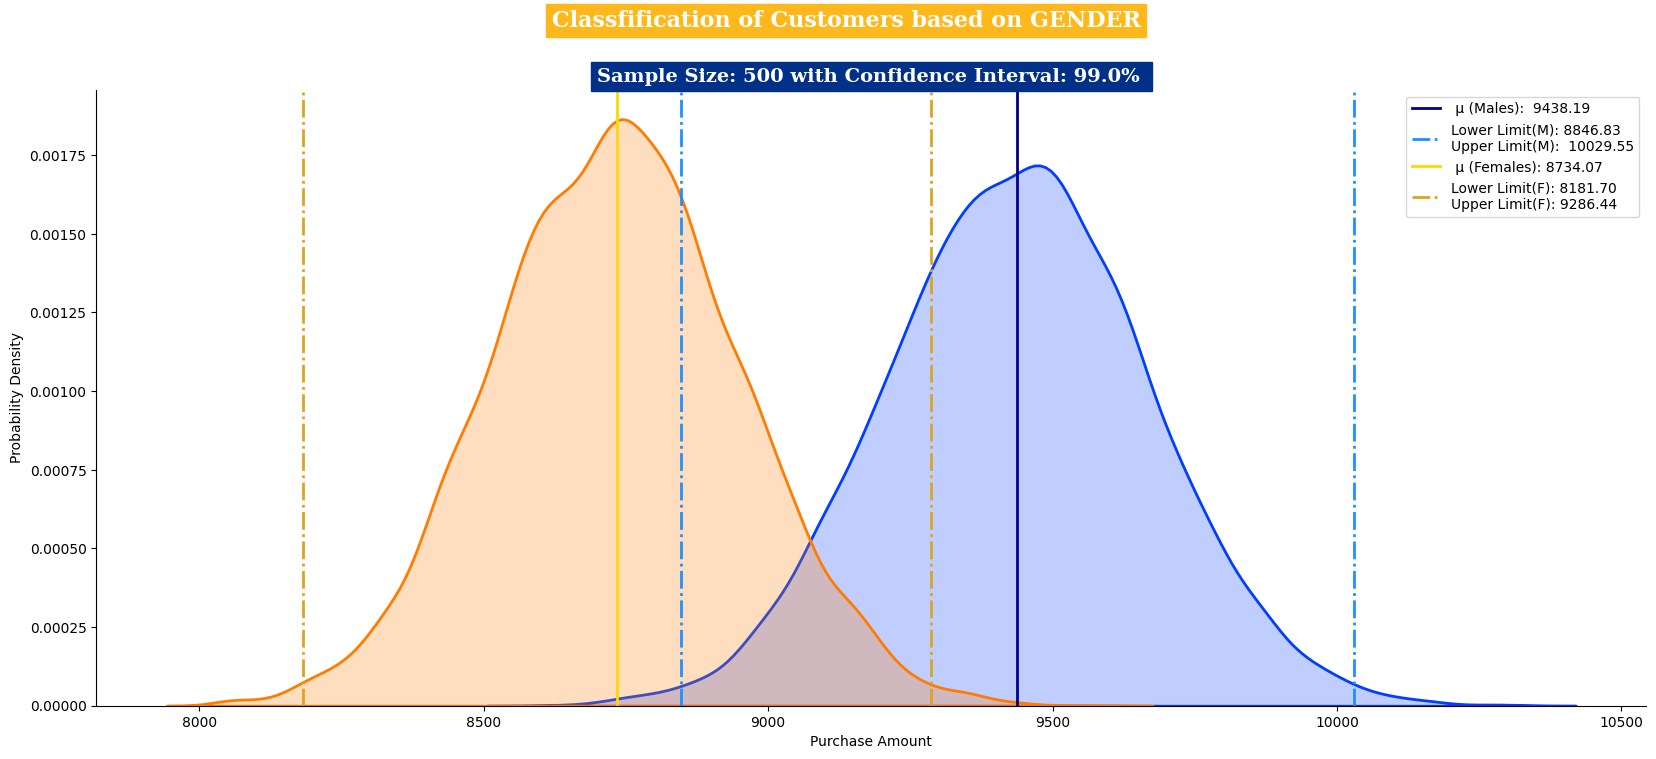

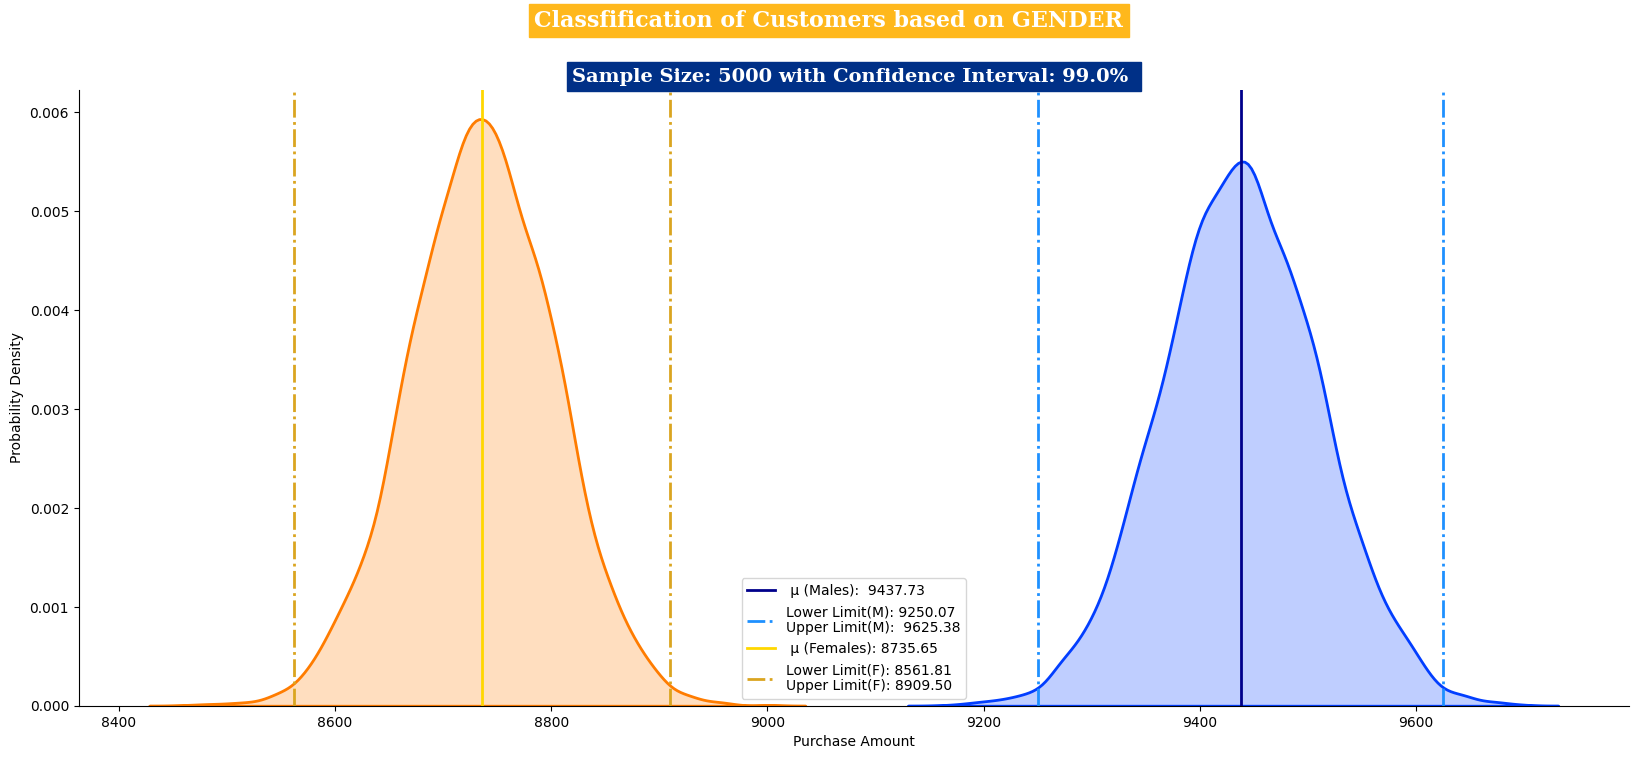

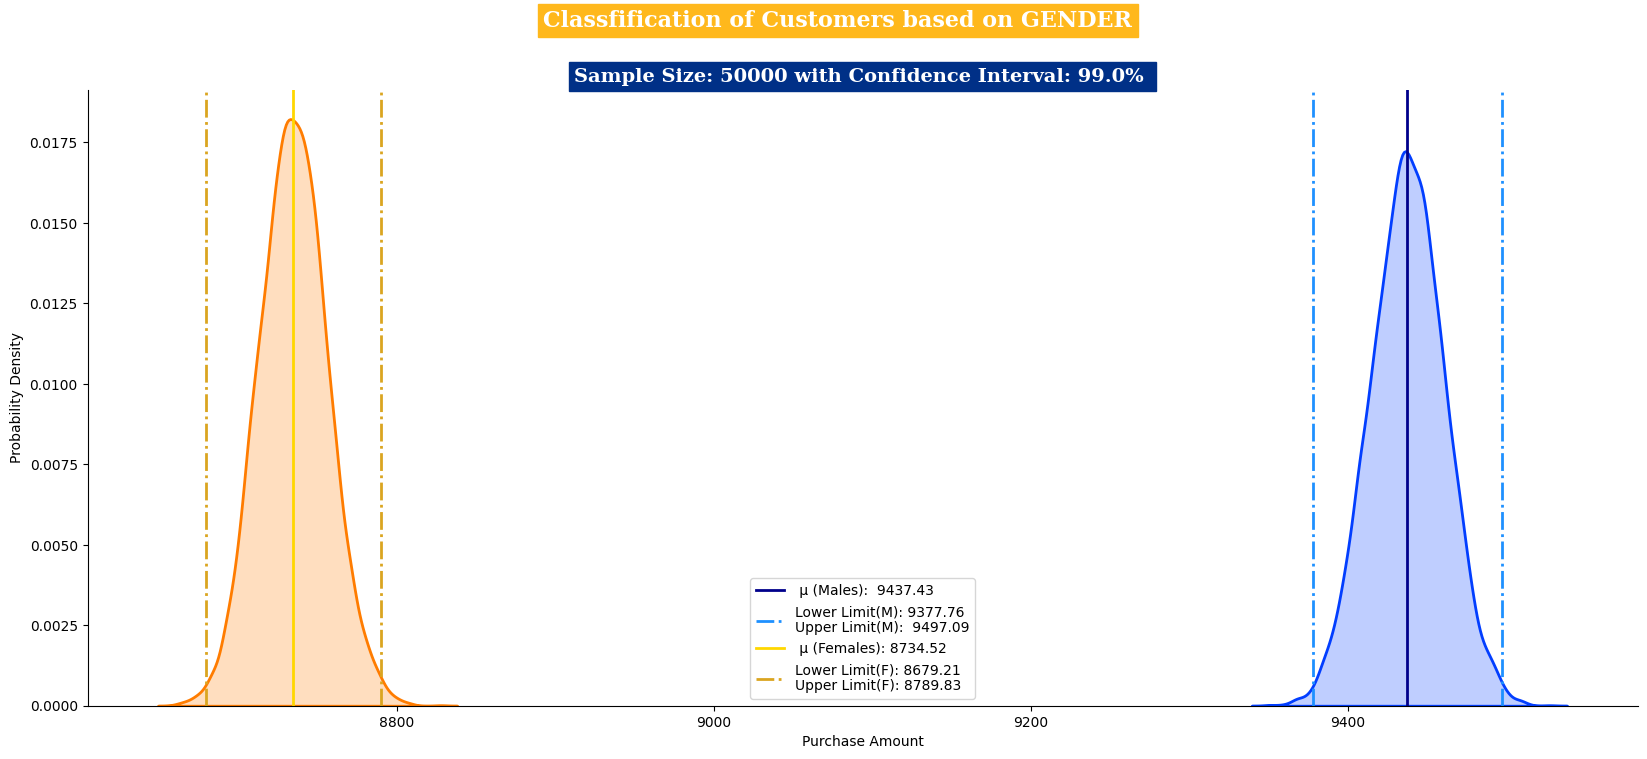

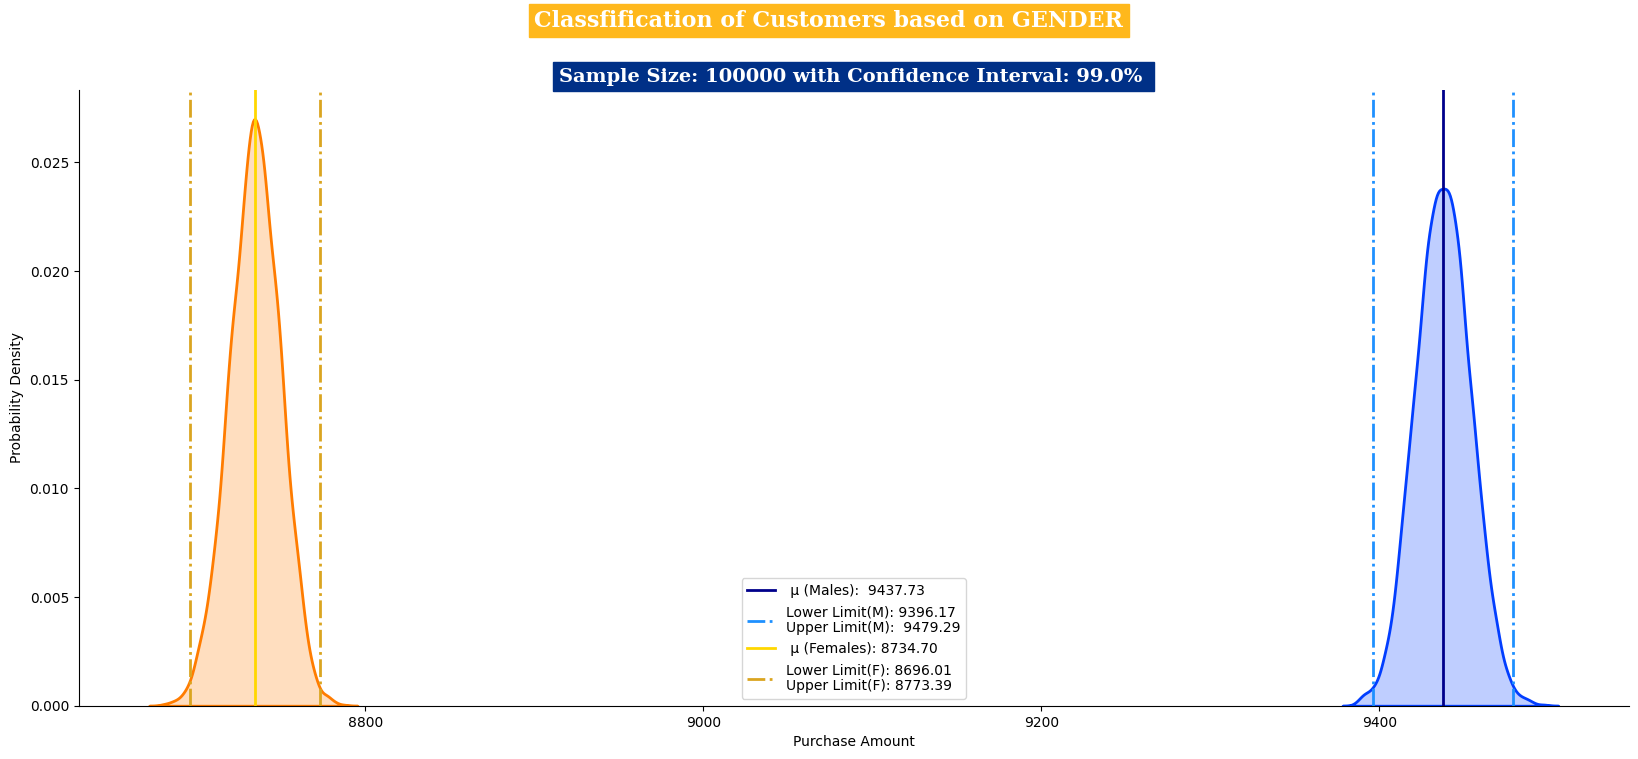

In [78]:
sample_sizes = [50,500,5000,50000,100000]
ci = [99]
ntimes = 10000

df = pd.DataFrame(columns=['Gender','Sample Size','Lower Limit','Upper Limit','Sample Mean','Confidence Interval','Range'])

for j in ci:
    for i in sample_sizes:
        m_avg, f_avg, ll_m, ul_m, ll_f, ul_f = bootstrapping('GENDER',male_purchase, female_purchase, i, ntimes, j)

        df.loc[len(df.index)] = ['M' , i , ll_m , ul_m , m_avg , j , (ul_m - ll_m)]
        df.loc[len(df.index)] = ['F' , i , ll_f , ul_f , f_avg , j , (ul_f - ll_f)]

df

🧐Observation

The average for both of them changes significantly as the sample size increases:

As the sample size increases, the average values for both genders undergo noticeable changes.

Larger sample sizes tend to provide more representative insights into the population, leading to more stable and reliable average values.

Both plots start to separate and become distinct:

With increasing sample size, the plots representing the data for males and females start to diverge and show distinct patterns.

This separation could indicate that the larger sample sizes are capturing more nuances in the data, revealing differences between males and females that might not be as apparent in smaller samples.

##CONCLUSION & RECOMMENDATION :

#Recommendations with Actionable Insights

Target Male Shoppers:

Launch targeted marketing campaigns showcasing products preferred by men. Offer exclusive deals on male-oriented items.
Age-Group Focus:

Analyze popular products within the 26 - 45 age group. Introduce promotions highlighting these products to enhance engagement.
Engage Younger Shoppers:

Create a loyalty program for the 0 - 17 age group with rewards for frequent purchases. Implement visually appealing online promotions.
Customer Segmentation:

Conduct a detailed analysis of buying behaviors within specific age brackets. Tailor promotions and product placements accordingly.
Enhance Shopping Experience (51 - 55):

Implement a personalized shopping experience for customers aged 51 - 55, including early access to sales and exclusive discounts.
Post-Black Friday Engagement:

Develop an automated follow-up email system with personalized recommendations based on customers' Black Friday purchases.
Differentiated Marketing for Genders:

Launch gender-specific marketing campaigns, emphasizing affordability for men and premium offerings for women.
Accessibility for All Age Groups:

Partner with local transport services to provide convenient transportation options. Promote online shopping accessibility for those facing mobility challenges.
Analyze High-Spending Individuals:

Conduct surveys or interviews with high-spending individuals to understand preferences. Use insights to refine product offerings and marketing strategies.
Collaboration with Local Transport:

Initiate discussions with local transport providers for potential collaborations. Offer discounts or incentives for customers using designated transport services.
Evaluate Price Sensitivity:

Implement dynamic pricing strategies based on real-time data analysis. Test price elasticity within different demographic segments.
Continuous Data Analysis:

Establish a dedicated data analytics team to continuously monitor and analyze customer data. Implement an agile approach to adapt strategies based on emerging trends.
